## BANK FRAUD Analysis  - CS6140 Machine Learning Project Group 4

In [1]:
from IPython.display import display, Markdown, HTML

table_of_contents = [
    {'title': 'Data Exploration', 'heading': '# Data Exploration'},
    {'title': 'Data Preparation', 'heading': '## Data Preparation'},
    {'title': 'Data Analysis', 'heading': '## Data Analysis'},
    {'title': 'Data Modelling', 'heading': '## Data Modelling',
     'subsections': [
         {'title': 'Logistic Regression', 'heading': '##  LOGISTIC REGRESSION'},
         {'title': 'Decision Tree', 'heading': '## DECISION TREE'},
         {'title': 'Random Forest Classifier', 'heading': '## RANDOM FOREST CLASSIFIER'},
         {'title': 'Support Vector Machine', 'heading': '##  SUPPORT VECTOR MACHINE'},
         {'title': 'Gradient Boosting Machine', 'heading': '## GRADIENT BOOSTING MACHINE'},
         {'title': 'Multi-Layer Perceptron', 'heading': '## MULTI-LAYER PERCEPTRON'},
         {'title': 'ROC Curve', 'heading': '## ROC CURVE'}
     ]},
    {'title': 'Data Modelling with Hyper-Tuning', 'heading': '## Data Modelling with Hyper-Tuning',
     'subsections': [
         {'title': 'Logistic Regression with Hyper-Tuning', 'heading': '##  LOGISTIC REGRESSION WITH HYPER TUNING'},
         {'title': 'Support Vector Machine with Hyper-Tuning', 'heading': '##  SUPPORT VECTOR MACHINE WITH HYPER TUNING'},
         {'title': 'Gradient Boosting Machine with Hyper-Tuning', 'heading': '## GRADIENT BOOSTING MACHINE WITH HYPER TUNING'},
         {'title': 'Multi-Layer Perceptron with Hyper-Tuning', 'heading': '## MULTI-LAYER PERCEPTRON WITH HYPER TUNING'},
         {'title': 'ROC Curve for different Hyper-Tuned models', 'heading': '## ROC CURVE FOR DIFFERENT HYPER TUNED MODELS'}
     ]},
    {'title': 'Conclusions', 'heading': '## Conclusions'},
]

toc_html = "<ul>"
for section in table_of_contents:
    toc_html += f'<li><a href="#{section["title"].lower().replace(" ", "-")}">{section["title"]}</a>'
    if 'subsections' in section:
        toc_html += "<ul>"
        for subsection in section['subsections']:
            toc_html += f'<li><a href="#{subsection["title"].lower().replace(" ", "-")}">{subsection["title"]}</a></li>'
        toc_html += "</ul>"
    toc_html += "</li>"
toc_html += "</ul>"

display(HTML(toc_html))



In [4]:
display(Markdown('# Data Exploration'))

# Data Exploration

### I -  Importing Necessary Libraries

In [5]:
#Basic Libraries - for dataframe loading & mathematical manipulation of data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to check missing values in data
import missingno as mno 

#for predicting scores 
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, classification_report, precision_score, recall_score, roc_auc_score
#splitting data into training and test
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

# Encoding categorical data to numerical
from sklearn.preprocessing import OneHotEncoder 
#Undersampling 
from sklearn.utils import resample 

#MODELS USED
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


#Kfolds cross validation
from sklearn.model_selection import KFold 
#PCA 
from sklearn.preprocessing import StandardScaler 

#Hyper parameter tuning 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from random import randint

#Customising plt graphs
plt.style.use('ggplot')

import warnings
from sklearn.exceptions import ConvergenceWarning 

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)



#Reading the data
raw_data = pd.read_csv("../Base.csv")

#Google Drive Link for Dataset : https://drive.google.com/drive/folders/1xbs9Q8frQnIAFcypyKXYDvE7ftcfVAwI?usp=drive_link

### II Understanding the Data

### Data Info 

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

### Data Statistics

In [7]:
raw_data.describe()

fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.000000                     52.000000   
75%                    12.000000                    130.000000   
max                   383.000000                    428.000000   

         customer_age  days_since_request  intended_balcon_amount  \
count  1000000.000000        1.000000e+06          1000000.000000   
mean        33.689080        1.025705e+00                8.661499   
std         12.025799        5.381835e+00               20.236155   
min         10.000000        4.036860e-09              -15.530555   
25%         20.000000        7.193246e-03               -1.181488   
50%         30.000000        1.517574e-02               -0.830507   
75%         40.000000        2.633069e-02                4.984176   
max         90.000000        7.845690e+01              112.956928   

         zip_count_4w     velocity_6h  ...  phone_mobile_valid  \
count  1000000.000000  1000000.000000  ...      1000000.000000   
mean      1572.692049     5665.296605  ...            0.889676   
std       1005.374565     3009.380665  ...            0.313293   
min          1.000000     -170.603072  ...            0.000000   
25%        894.000000     3436.365848  ...            1.000000   
50%       1263.000000     5319.769349  ...            1.000000   
75%       1944.000000     7680.717827  ...            1.000000   
max       6700.000000    16715.565404  ...            1.000000   

       bank_months_count  has_other_cards  proposed_credit_limit  \
count     1000000.000000   1000000.000000         1000000.000000   
mean           10.839303         0.222988             515.851010   
std            12.116875         0.416251             487.559902   
min            -1.000000         0.000000             190.000000   
25%            -1.000000         0.000000             200.000000   
50%             5.000000         0.000000             200.000000   
75%            25.000000         0.000000             500.000000   
max            32.000000         1.000000            2100.000000   

       foreign_request  session_length_in_minutes  keep_alive_session  \
count   1000000.000000             1000000.000000      1000000.000000   
mean          0.025242                   7.544940            0.576947   
std           0.156859                   8.033106            0.494044   
min           0.000000                  -1.000000            0.000000   
25%           0.000000                   3.103053            0.000000   
50%           0.000000                   5.114321            1.000000   
75%           0.000000                   8.866131            1.000000   
max           1.000000                  85.899143            1.000000   

       device_distinct_emails_8w  device_fraud_count           month  
count             1000000.000000           1000000.0  1000000.000000  
mean                    1.018312                 0.0        3.288674  
std                     0.180761                 0.0        2.209994  
min                    -1.000000                 0.0        0.00000

### Datatypes Counts

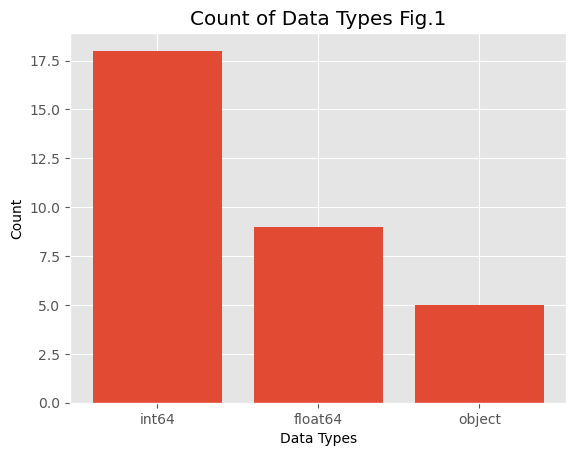

In [8]:
dtype_counts = raw_data.dtypes.value_counts()

# Create a bar plot
plt.bar(dtype_counts.index.astype(str), dtype_counts.values)

# Set labels and title
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.title('Count of Data Types Fig.1')
plt.grid(True)


# Display the plot
plt.show()

### Missing Values

<Axes: >

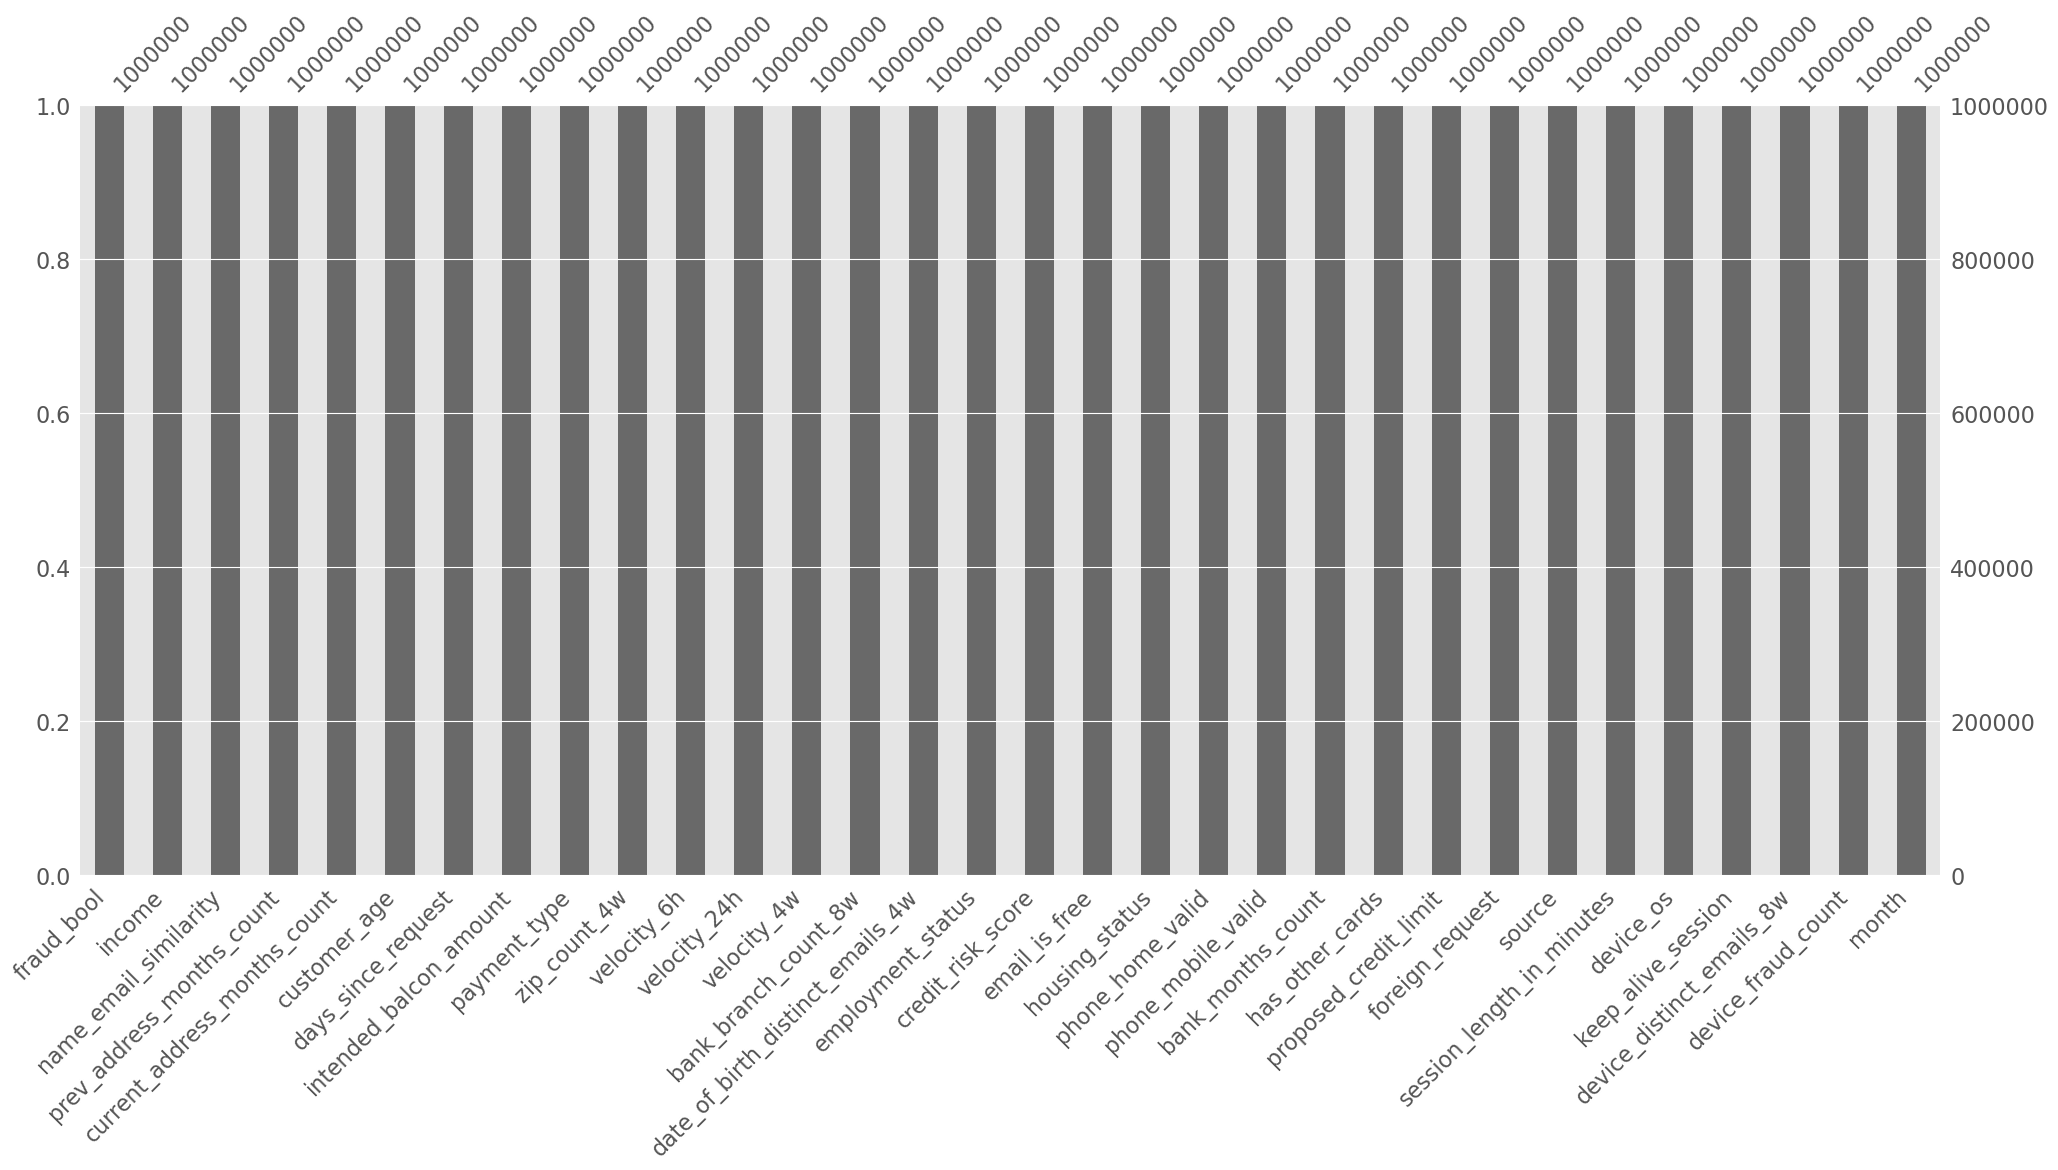

In [9]:
# Missing values - None
mno.bar(raw_data)

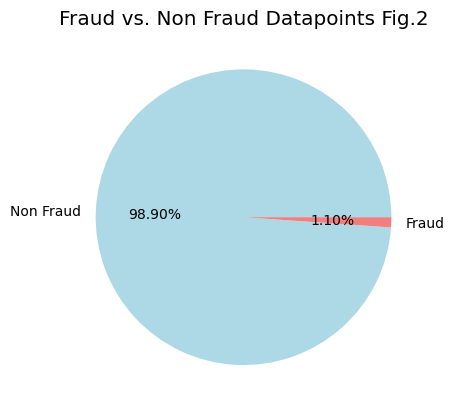

Number of Non-Fraudulent examples: 988971
Number of Fraudulent examples: 11029


In [10]:

raw_data["fraud_bool"] = pd.to_numeric(raw_data["fraud_bool"])

# Counts of fraud Vs non-fraud 
fraud_counts = raw_data["fraud_bool"].value_counts()
sizes = [fraud_counts[0], fraud_counts[1]]

colors = ['lightblue', 'lightcoral']

# Pie Chart
plt.pie(sizes, labels=["Non Fraud", "Fraud"],colors=colors, autopct="%1.2f%%")
plt.title("Fraud vs. Non Fraud Datapoints Fig.2")
plt.show()

fraud = raw_data['fraud_bool'] == 1
non_fraud = raw_data['fraud_bool'] == 0

print("Number of Non-Fraudulent examples:", non_fraud.sum())
print("Number of Fraudulent examples:", fraud.sum())


**EDA Results/Findings :**

1. The dataset contains a total of 1 Million rows and 32 columns (features). Every row corresponds to an individual entry. Every column represents a specific feature.

2. The data does not contain any missing values (null). This indicates that there are no incomplete or unreliable data points.

3. As evidently displayed by the Pi Chart(Fig.2), the dataset is highly **unbalanced**. We have 1.10% examples as fraud (11029 datapoints) and 98.90% examples as non fraud (988971 datapoints). 

4. This means the dataset requires further balancing before we proceed with the predictive analysis. 

----------------------------------------------------------------

In [11]:
display(Markdown('# Data Preparation'))

# Data Preparation

As we have significant data imbalance, we need to choose appropriate balancing technique. We can either **"Over sample"** or **"Under sample"**

Choosing between whether to Over Sample or Under Sample the data depends on various factors including but not limited to - the problem we're trying to solve, dataset nature and characteristics of the minority and majority classes in the dataset. 

1. SMOTE (Synthetic Minority Over-sampling Technique):
>SMOTE is used when there is a class imbalance and the minority class (fraud in our case) has insufficient samples for the model to learn effectively. 
It generates synthetic samples for the minority class by interpolating between existing samples. 
> SMOTE works well when there is small dataset or when the characteristics of the minority class are complex and can be generalized through interpolation.
>One of the biggest disadvantages of SMOTE is **overfitting**: While SMOTE can be effective in balancing the class distribution and improving model performance, it may lead to overfitting, especially when the synthetic samples are too close to the original minority class instances.

2. Undersampling: 
>Undersampling as the name suggests means removing some samples from the majority class (non fraud in our case)  to balance the class distribution.
>Undersampling can be useful when you have a large dataset, and removing some samples from the majority class does not significantly impact the model's overall performance.

**What did we employ ?**

Since we're working with a large dataset with a majority of non-fraud value, we used Undersampling to balance the dataset. 
Upon evaluating the model's accuracy using Over Sampling techniques, we found that the test accuracy was approximately 20% lower than the training accuracy. This discrepancy in accuracy suggests that Oversampling, specifically using SMOTE, has led to overfitting on our dataset. 

### I. Data Balancing

In [12]:
df = raw_data.copy()

majority_non_fraud = df[df['fraud_bool'] == 0]
minority_fraud = df[df['fraud_bool'] == 1]

# Down sampling the majority class data to match the size of minority class data
majority_non_fraud_downsampled = resample(majority_non_fraud, 
                                 replace=False,    
                                 n_samples=len(minority_fraud))

# Combining the both classes instances
undersampled_data = pd.concat([majority_non_fraud_downsampled, minority_fraud])


#Printing the shape of data after downsampling
print(undersampled_data.shape)

(22058, 32)


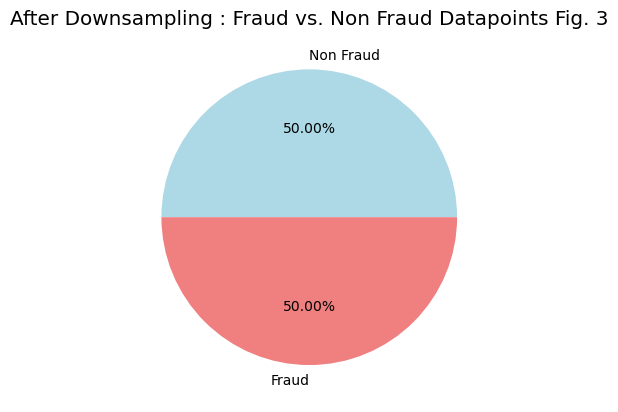

Before Downsampling
Number of Fraudulent Transactions : 11029
Number of Non-Fraudulent Transactions : 988971


After Downsampling
Number of Fraudulent examples: 11029
Number of Non-Fraudulent examples: 11029


In [13]:
undersampled_data["fraud_bool"] = pd.to_numeric(undersampled_data["fraud_bool"])

# Counts of fraud Vs non-fraud 
fraud_counts = undersampled_data["fraud_bool"].value_counts()
sizes = [fraud_counts[0], fraud_counts[1]]

colors = ['lightblue', 'lightcoral']

# Pie Chart
plt.pie(sizes, labels=["Non Fraud", "Fraud"],colors=colors, autopct="%1.2f%%")
plt.title("After Downsampling : Fraud vs. Non Fraud Datapoints Fig. 3")
plt.show()

fraud = undersampled_data['fraud_bool'] == 1
non_fraud = undersampled_data['fraud_bool'] == 0


print("Before Downsampling")
print("Number of Fraudulent Transactions :", len(minority_fraud))
print("Number of Non-Fraudulent Transactions :", len(majority_non_fraud))

print("\n")
print("After Downsampling")
print("Number of Fraudulent examples:", fraud.sum())
print("Number of Non-Fraudulent examples:", non_fraud.sum())


### II. Handling Categorical Features

>One Hot Encoding and Label Encoding are two common techniques used to handle categorical data in machine learning. The choice between them depends on the nature of the categorical variable and the algorithms you intend to use.

>Some machine learning algorithms, such as regression, can assume that higher numeric values have higher importance. In Label Encoding, this could introduce unintended biases, as mentioned in the previous point. One Hot Encoding prevents such biases by treating each category independently.

### One Hot Encoding

In [16]:
# data clone
before_encoding_undersampled_data = undersampled_data.copy()

object_type_columns = undersampled_data.select_dtypes(include='object').columns

# one-hot encoding using panda 
undersampled_data = pd.get_dummies(undersampled_data, columns=object_type_columns)

print("Dataset Shape Before Encoding:",before_encoding_undersampled_data.shape)

print("Dataset Shape After Encoding:",undersampled_data.shape)


Dataset Shape Before Encoding: (22058, 53)
Dataset Shape After Encoding: (22058, 53)


In [17]:
display(Markdown('# Data Analysis'))

# Data Analysis

### I. Distinct Values in every column

In [18]:
distinct_values_per_column = undersampled_data.nunique()
print(distinct_values_per_column.sort_values())

device_fraud_count                      1
payment_type_AB                         2
payment_type_AC                         2
payment_type_AD                         2
payment_type_AE                         2
employment_status_CA                    2
employment_status_CB                    2
employment_status_CC                    2
employment_status_CD                    2
employment_status_CE                    2
employment_status_CF                    2
employment_status_CG                    2
fraud_bool                              2
housing_status_BB                       2
housing_status_BC                       2
housing_status_BD                       2
housing_status_BE                       2
housing_status_BF                       2
housing_status_BG                       2
source_INTERNET                         2
source_TELEAPP                          2
device_os_linux                         2
device_os_macintosh                     2
device_os_other                   

### II Plotting Graphs between Target and Features

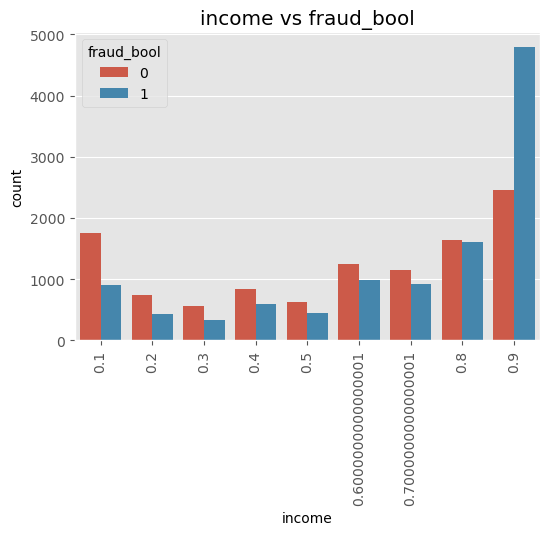

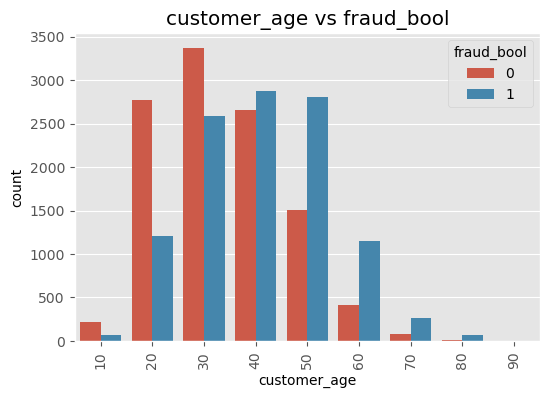

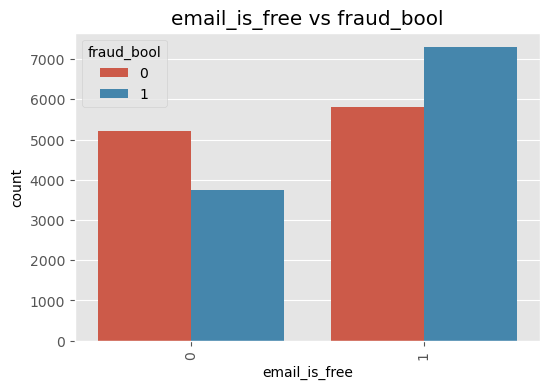

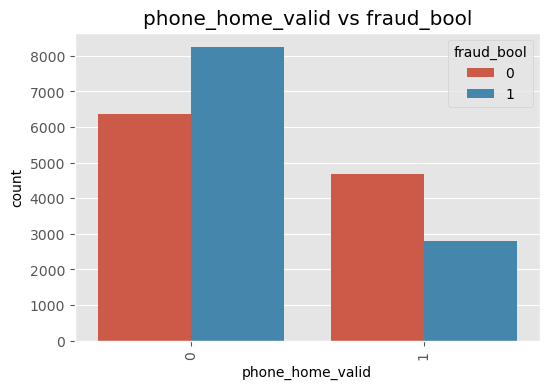

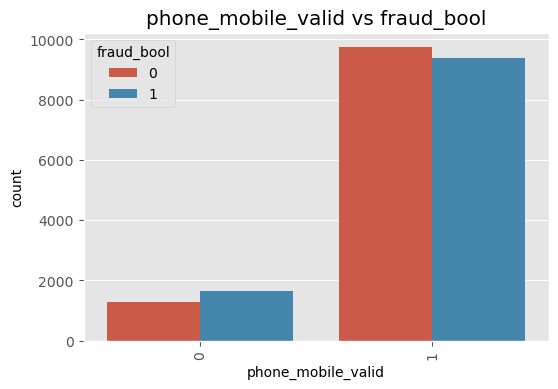

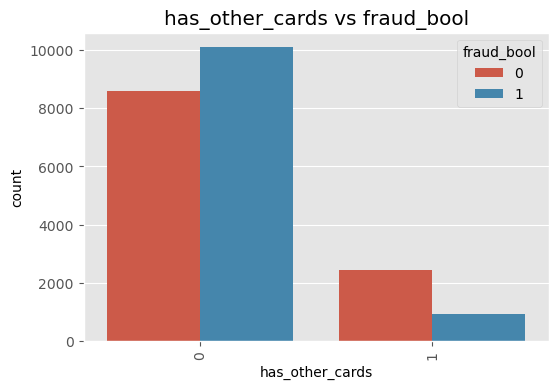

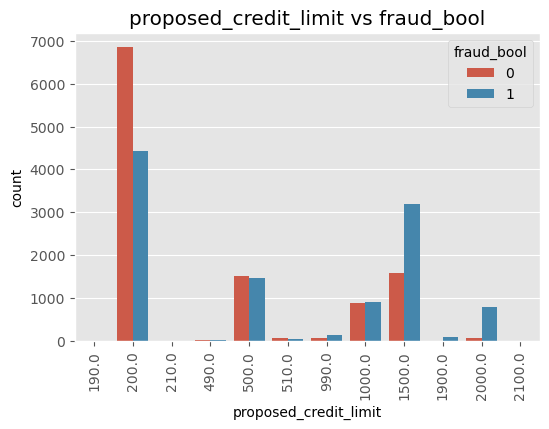

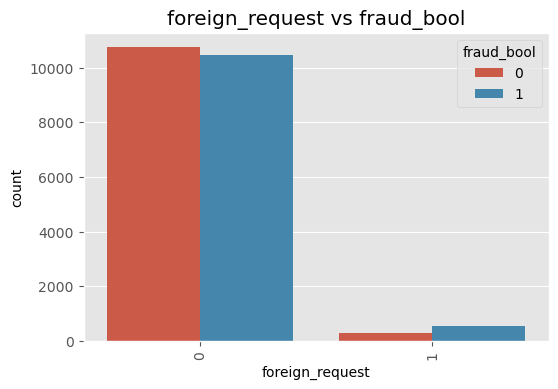

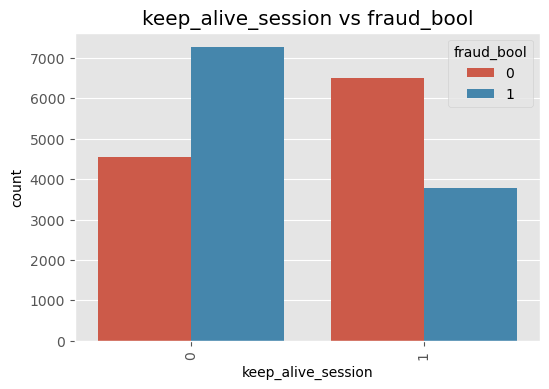

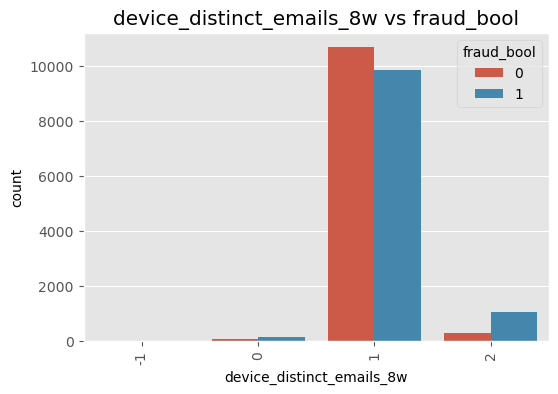

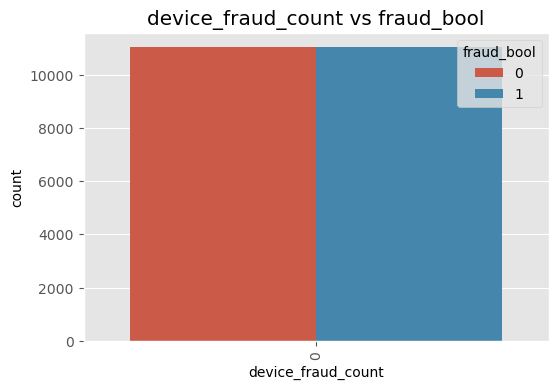

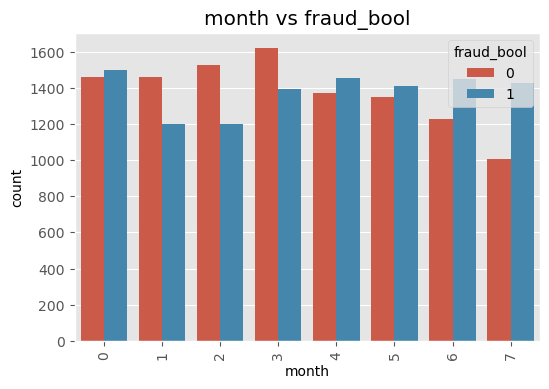

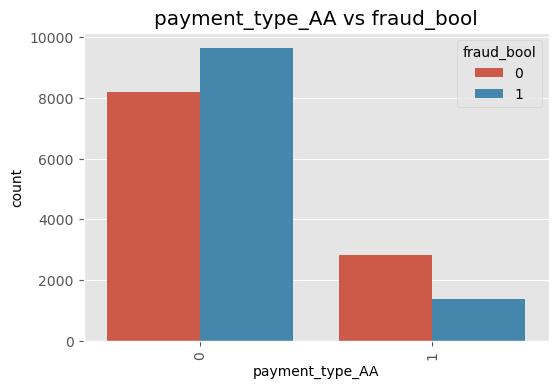

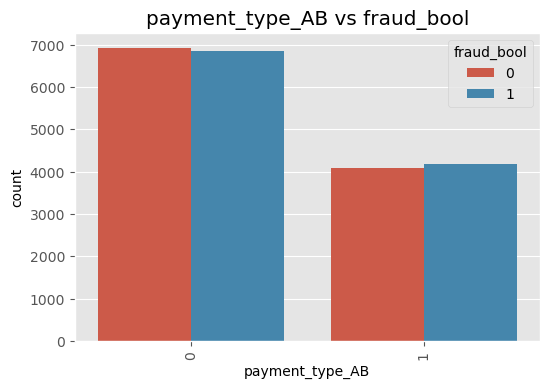

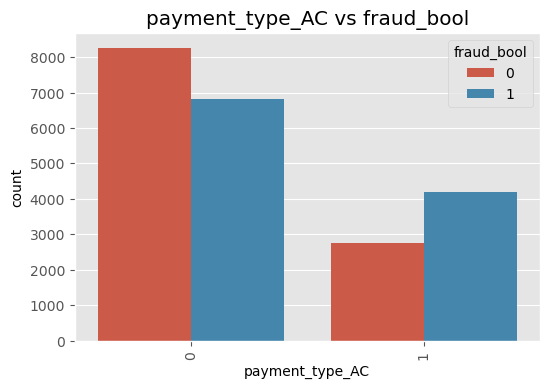

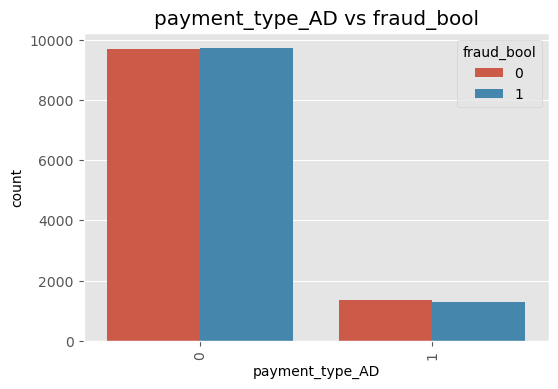

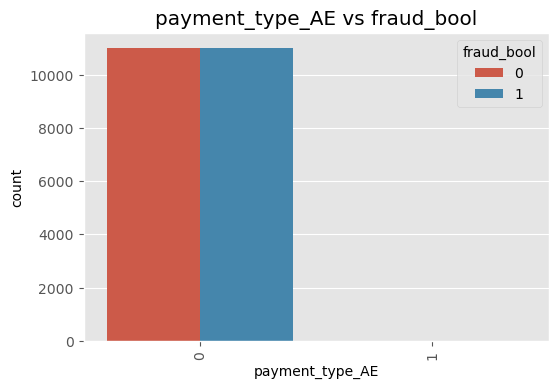

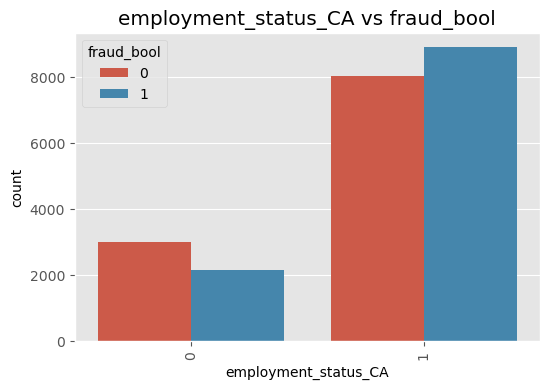

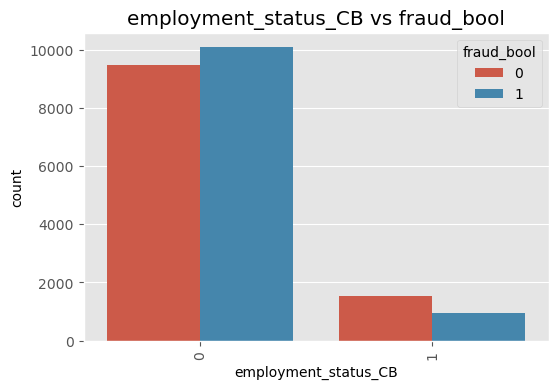

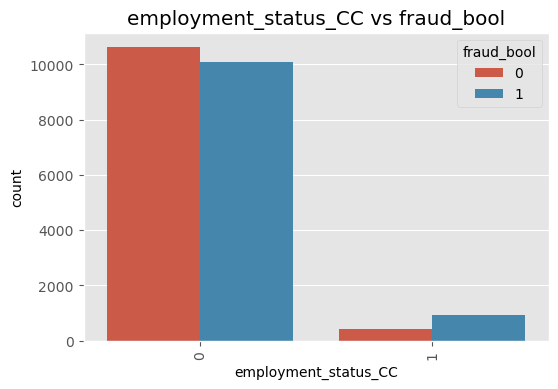

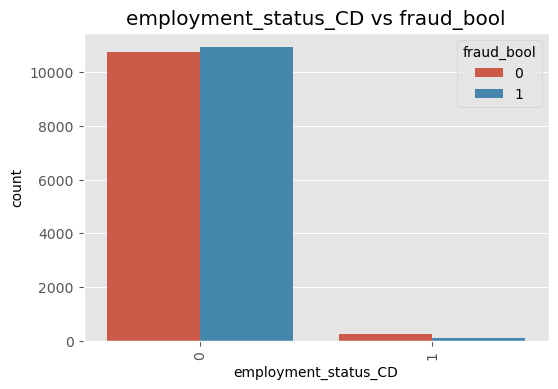

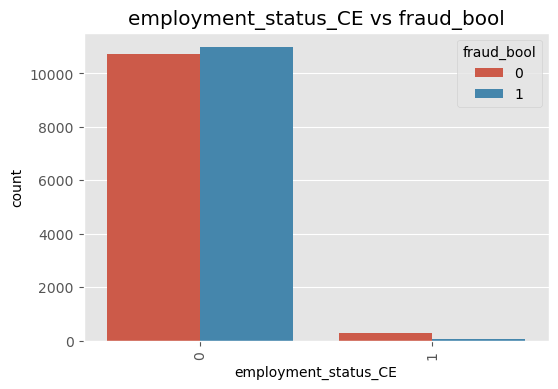

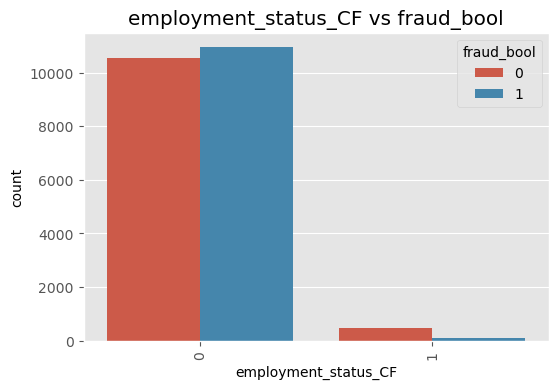

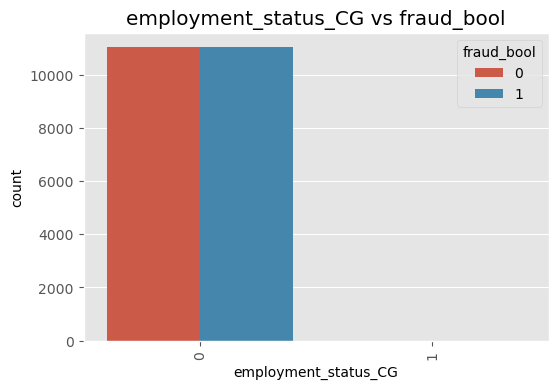

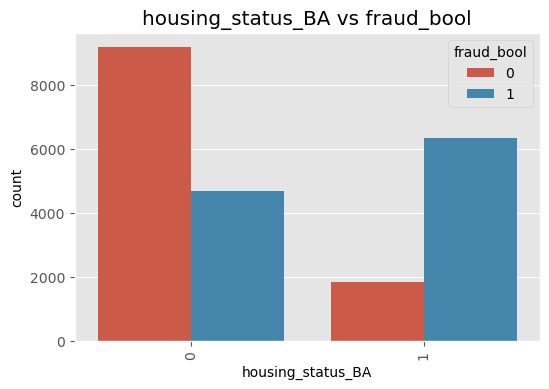

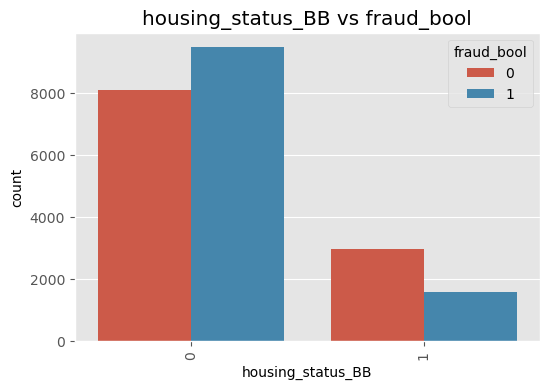

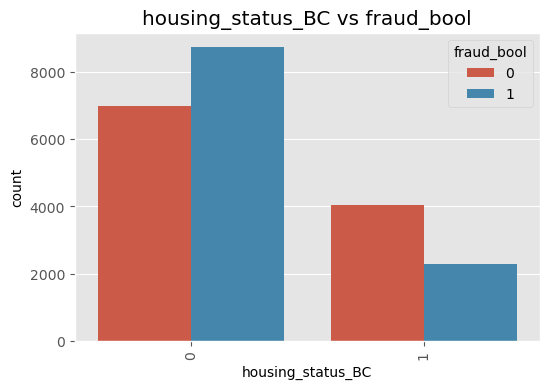

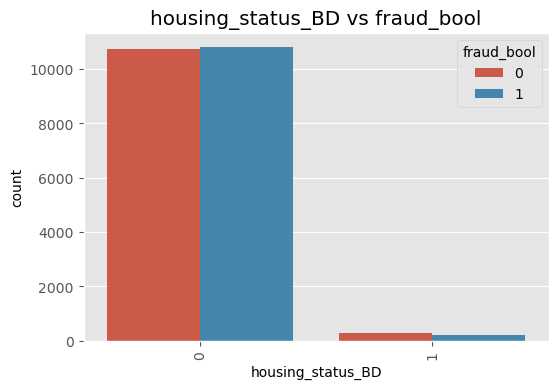

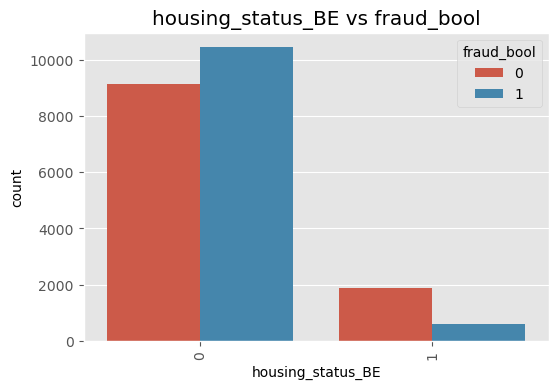

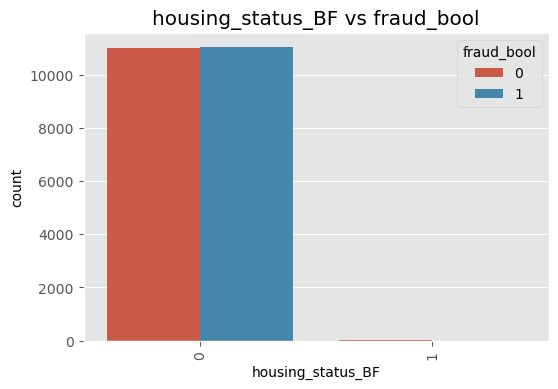

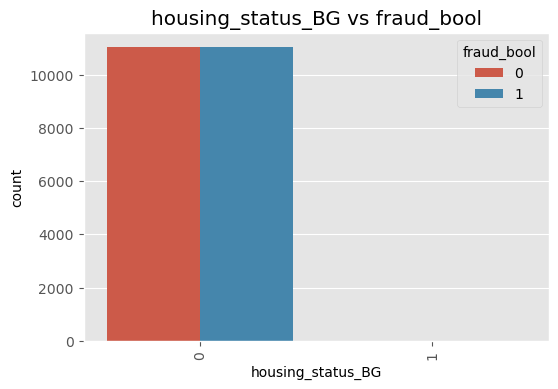

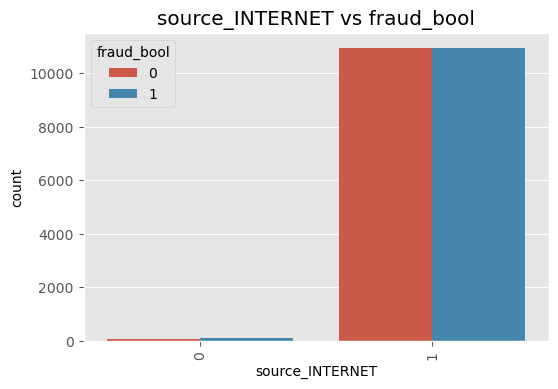

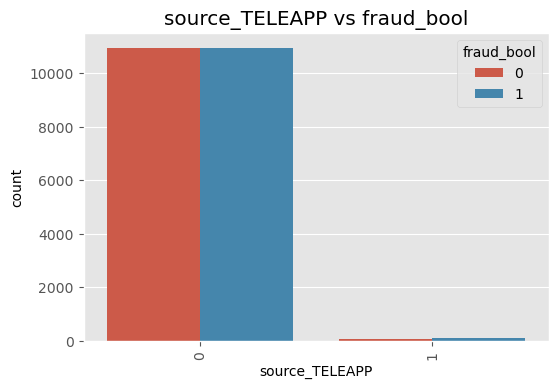

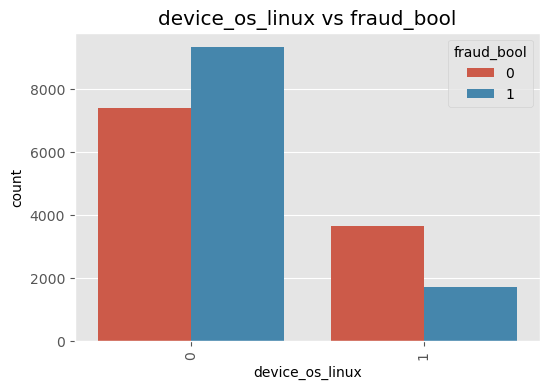

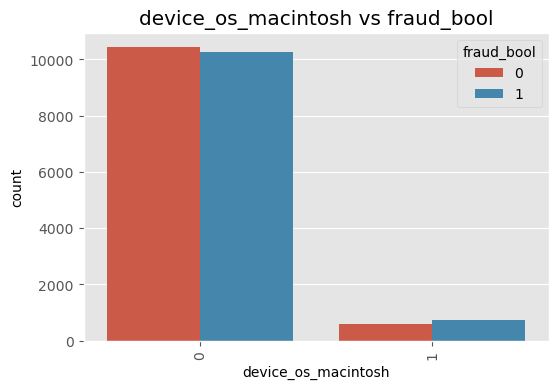

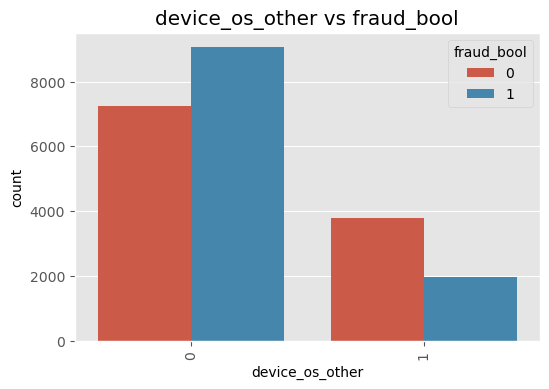

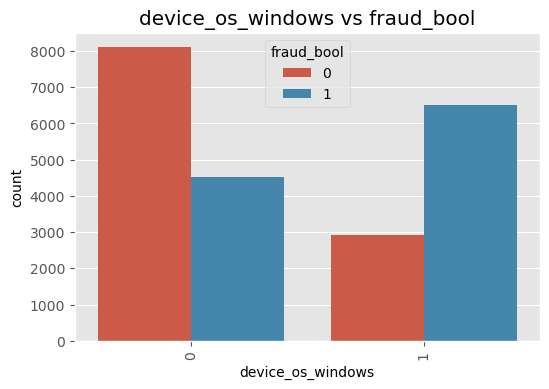

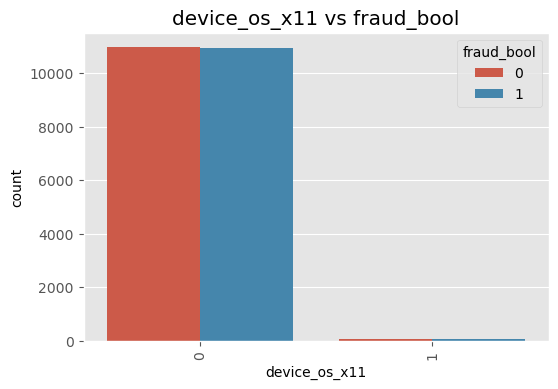

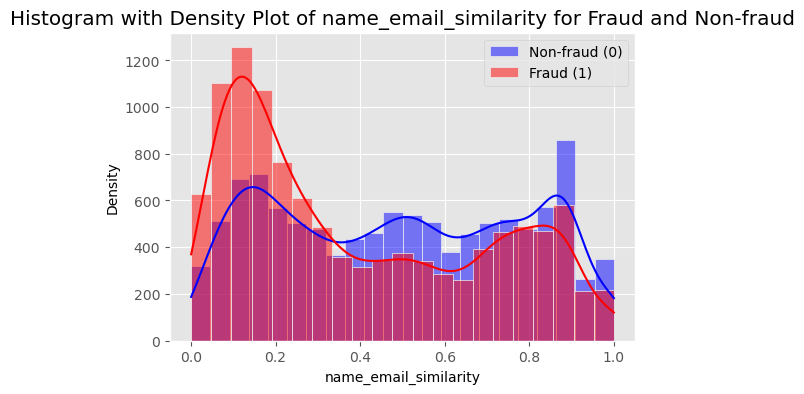

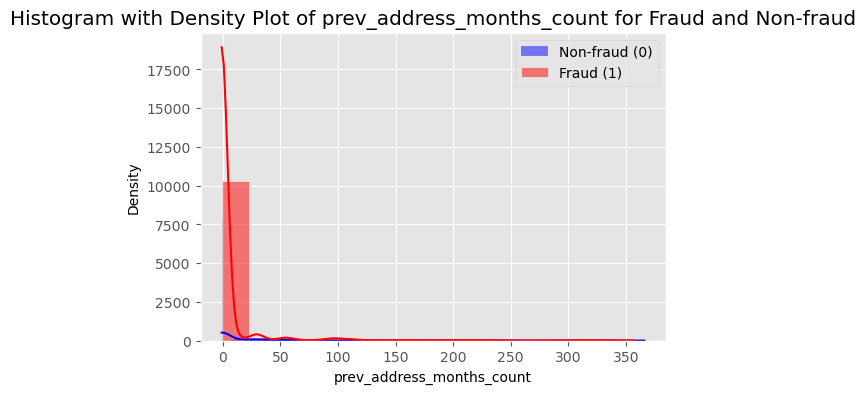

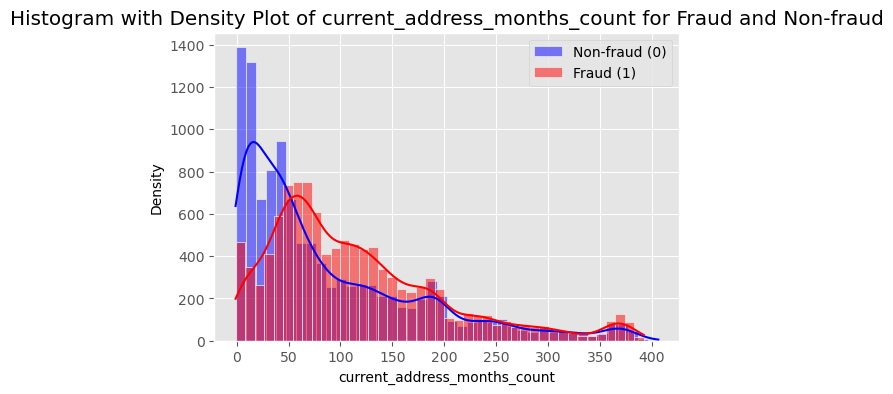

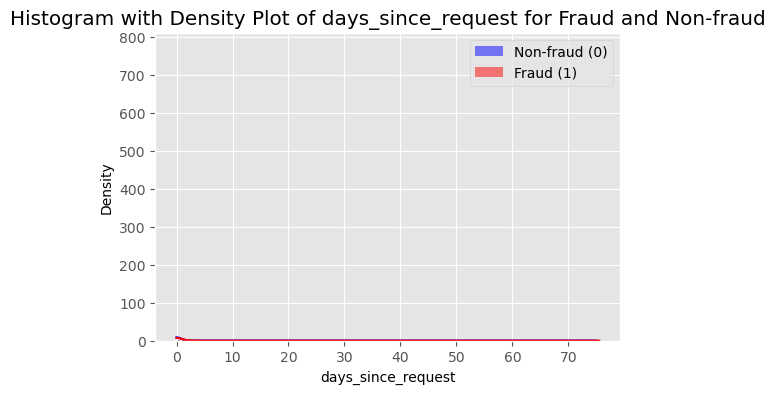

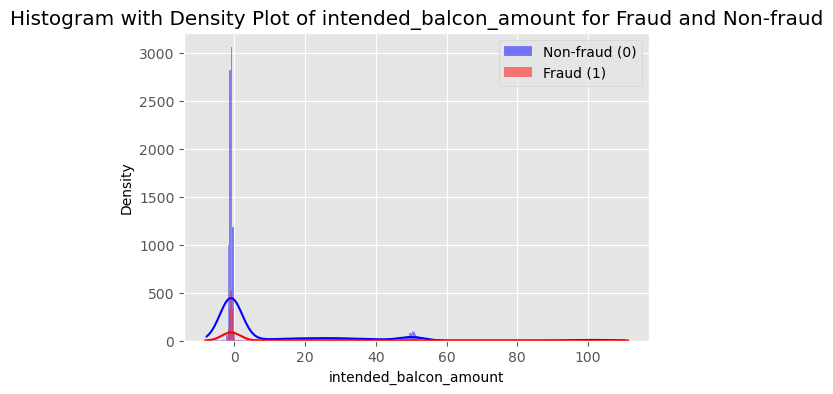

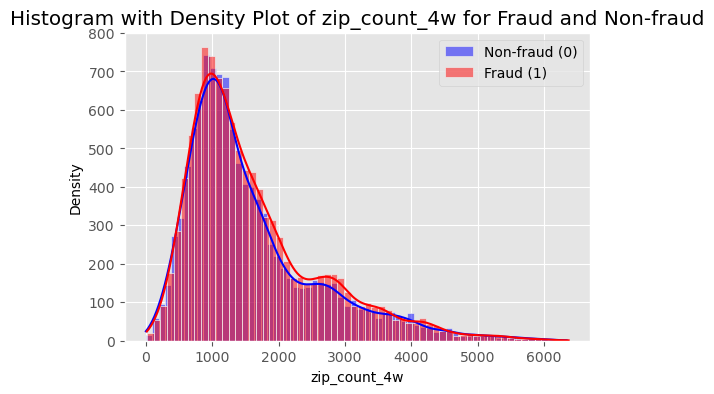

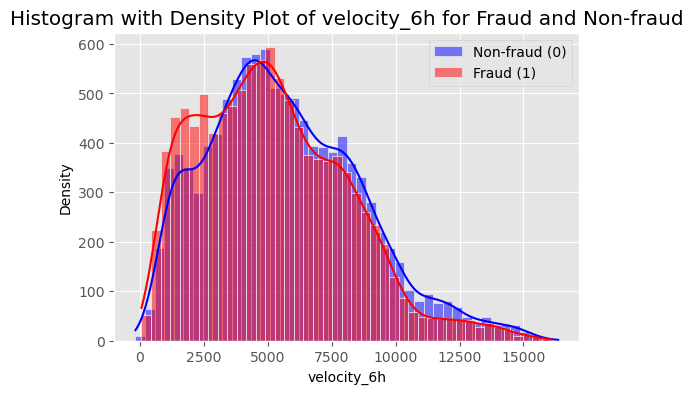

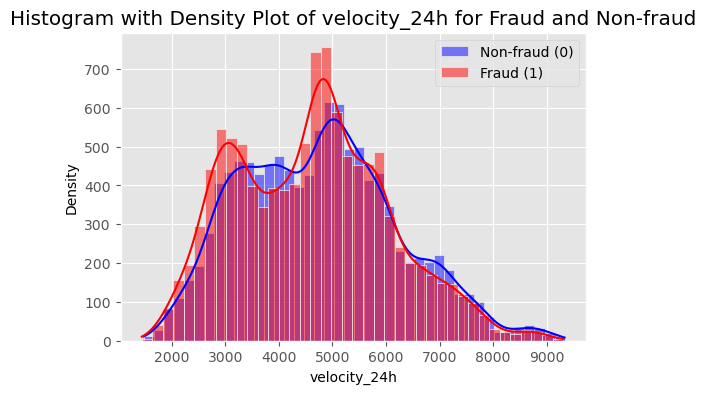

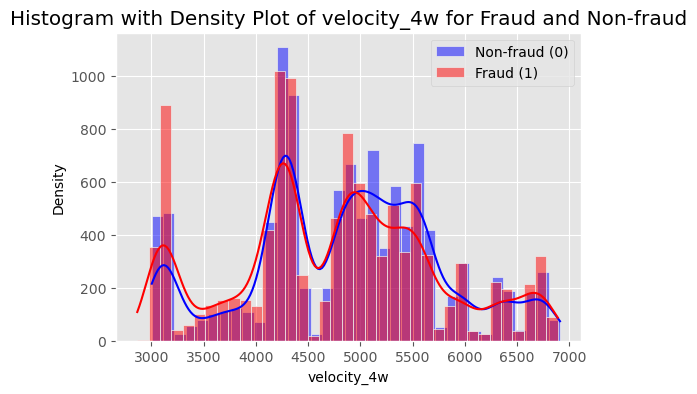

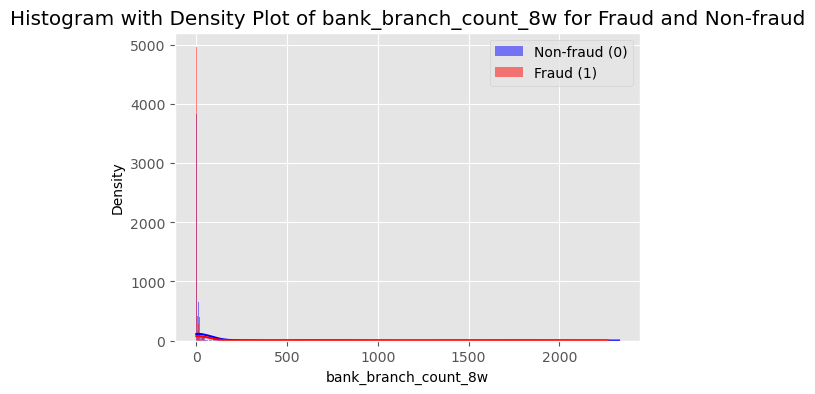

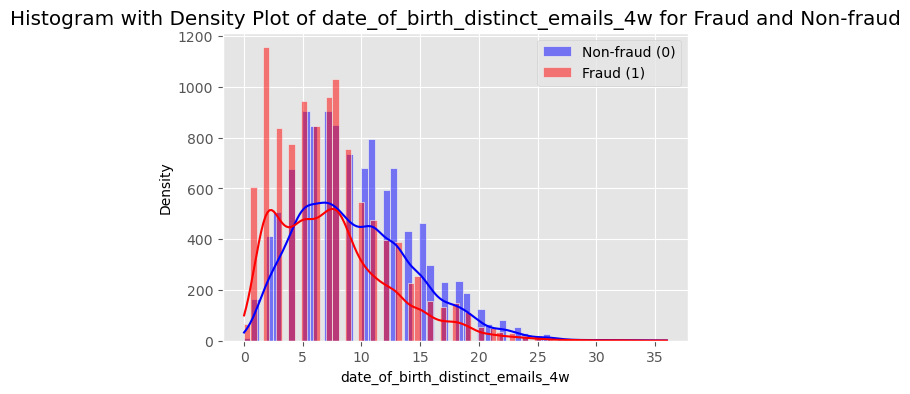

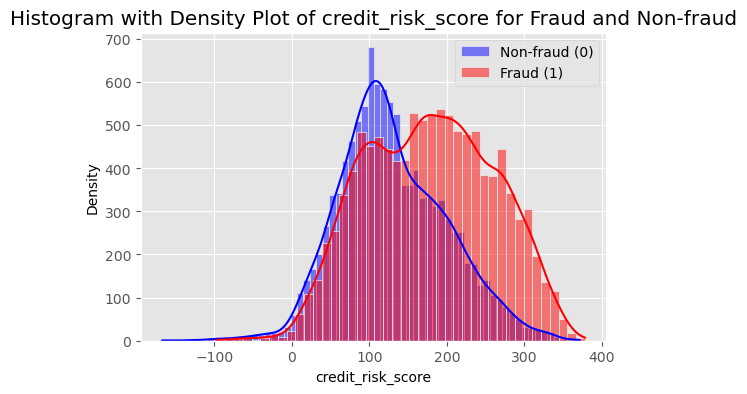

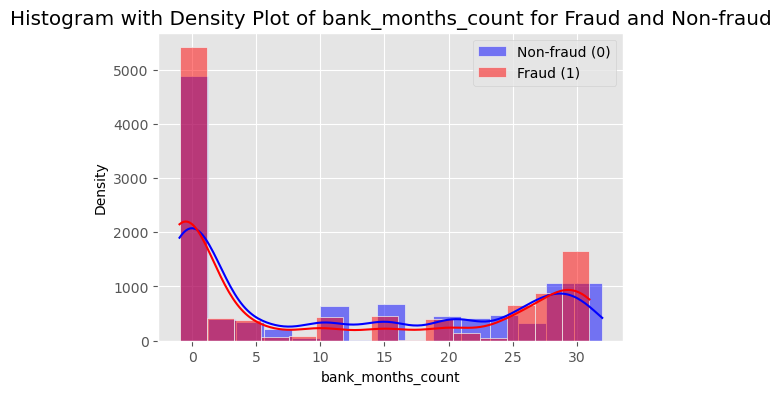

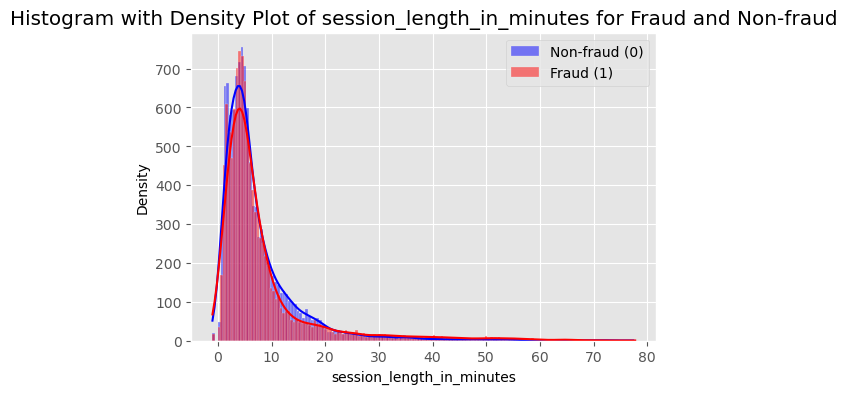

In [19]:
# Categorize columns as categorical or numerical based on unique values
categorical_cols = []
numerical_cols = []
target_col = 'fraud_bool'

for col in undersampled_data.columns:
    if undersampled_data[col].nunique() < 15:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Visualize categorical columns using count plots
for col in categorical_cols:
    if col == target_col:
        continue  # Skip plotting the target column
    plt.figure(figsize=(6, 4))  
    sns.countplot(x=col, hue=target_col, data=undersampled_data)
    plt.title(f"{col} vs {target_col}")
    plt.xticks(rotation=90)
    plt.show()

# Visualize numerical columns using histograms with density plots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))  
    sns.histplot(undersampled_data[undersampled_data[target_col] == 0][col], kde=True, color='blue', label='Non-fraud (0)')
    sns.histplot(undersampled_data[undersampled_data[target_col] == 1][col], kde=True, color='red', label='Fraud (1)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Histogram with Density Plot of {col} for Fraud and Non-fraud')
    plt.legend()
    plt.show()


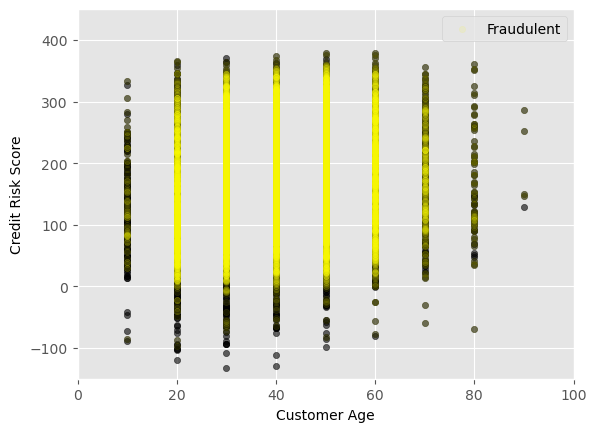

In [21]:
# Customer Age & Credit Risk Score

plt.scatter(undersampled_data['customer_age'], undersampled_data['credit_risk_score'], s=20, c='black', alpha=0.6)

fraud_data = undersampled_data[undersampled_data['fraud_bool'] == 1]

plt.scatter(fraud_data['customer_age'], fraud_data['credit_risk_score'], s=20, c='yellow', alpha=0.1, label='Fraudulent')

plt.xlabel("Customer Age")
plt.ylabel("Credit Risk Score")

plt.grid(True)
plt.xlim(0, 100)
plt.ylim(-150, 450)
plt.legend()
plt.show()

### III Variance Threshold Test for Constant Features
>A constant feature is a feature in a dataset that has the same value for all instances or samples. Or we can say a constant feature does not provide any useful information for distinguishing between different samples because it does not vary across the dataset. 

In [22]:
# Instantiate a VarianceThreshold selector with a threshold of 0 (default)
selector = VarianceThreshold()

# Fit the selector to the dataset
selector.fit(undersampled_data)

# Get the indices of non-constant features
non_constant_indices = selector.get_support(indices=True)

# Get the names of constant features
constant_features = [column for index, 
                     column in enumerate(undersampled_data.columns) 
                     if index not in non_constant_indices]

# Print the names of constant features
print("Constant features:", constant_features)


Constant features: ['device_fraud_count']


In [23]:
# Dropping the constant features
undersampled_data = undersampled_data.drop(columns=constant_features)
print("Data Shape after dropping constant features: ")
print(undersampled_data.shape)

Data Shape after dropping constant features: 
(22058, 52)


### IV Correlation Heatmap 

<Axes: >

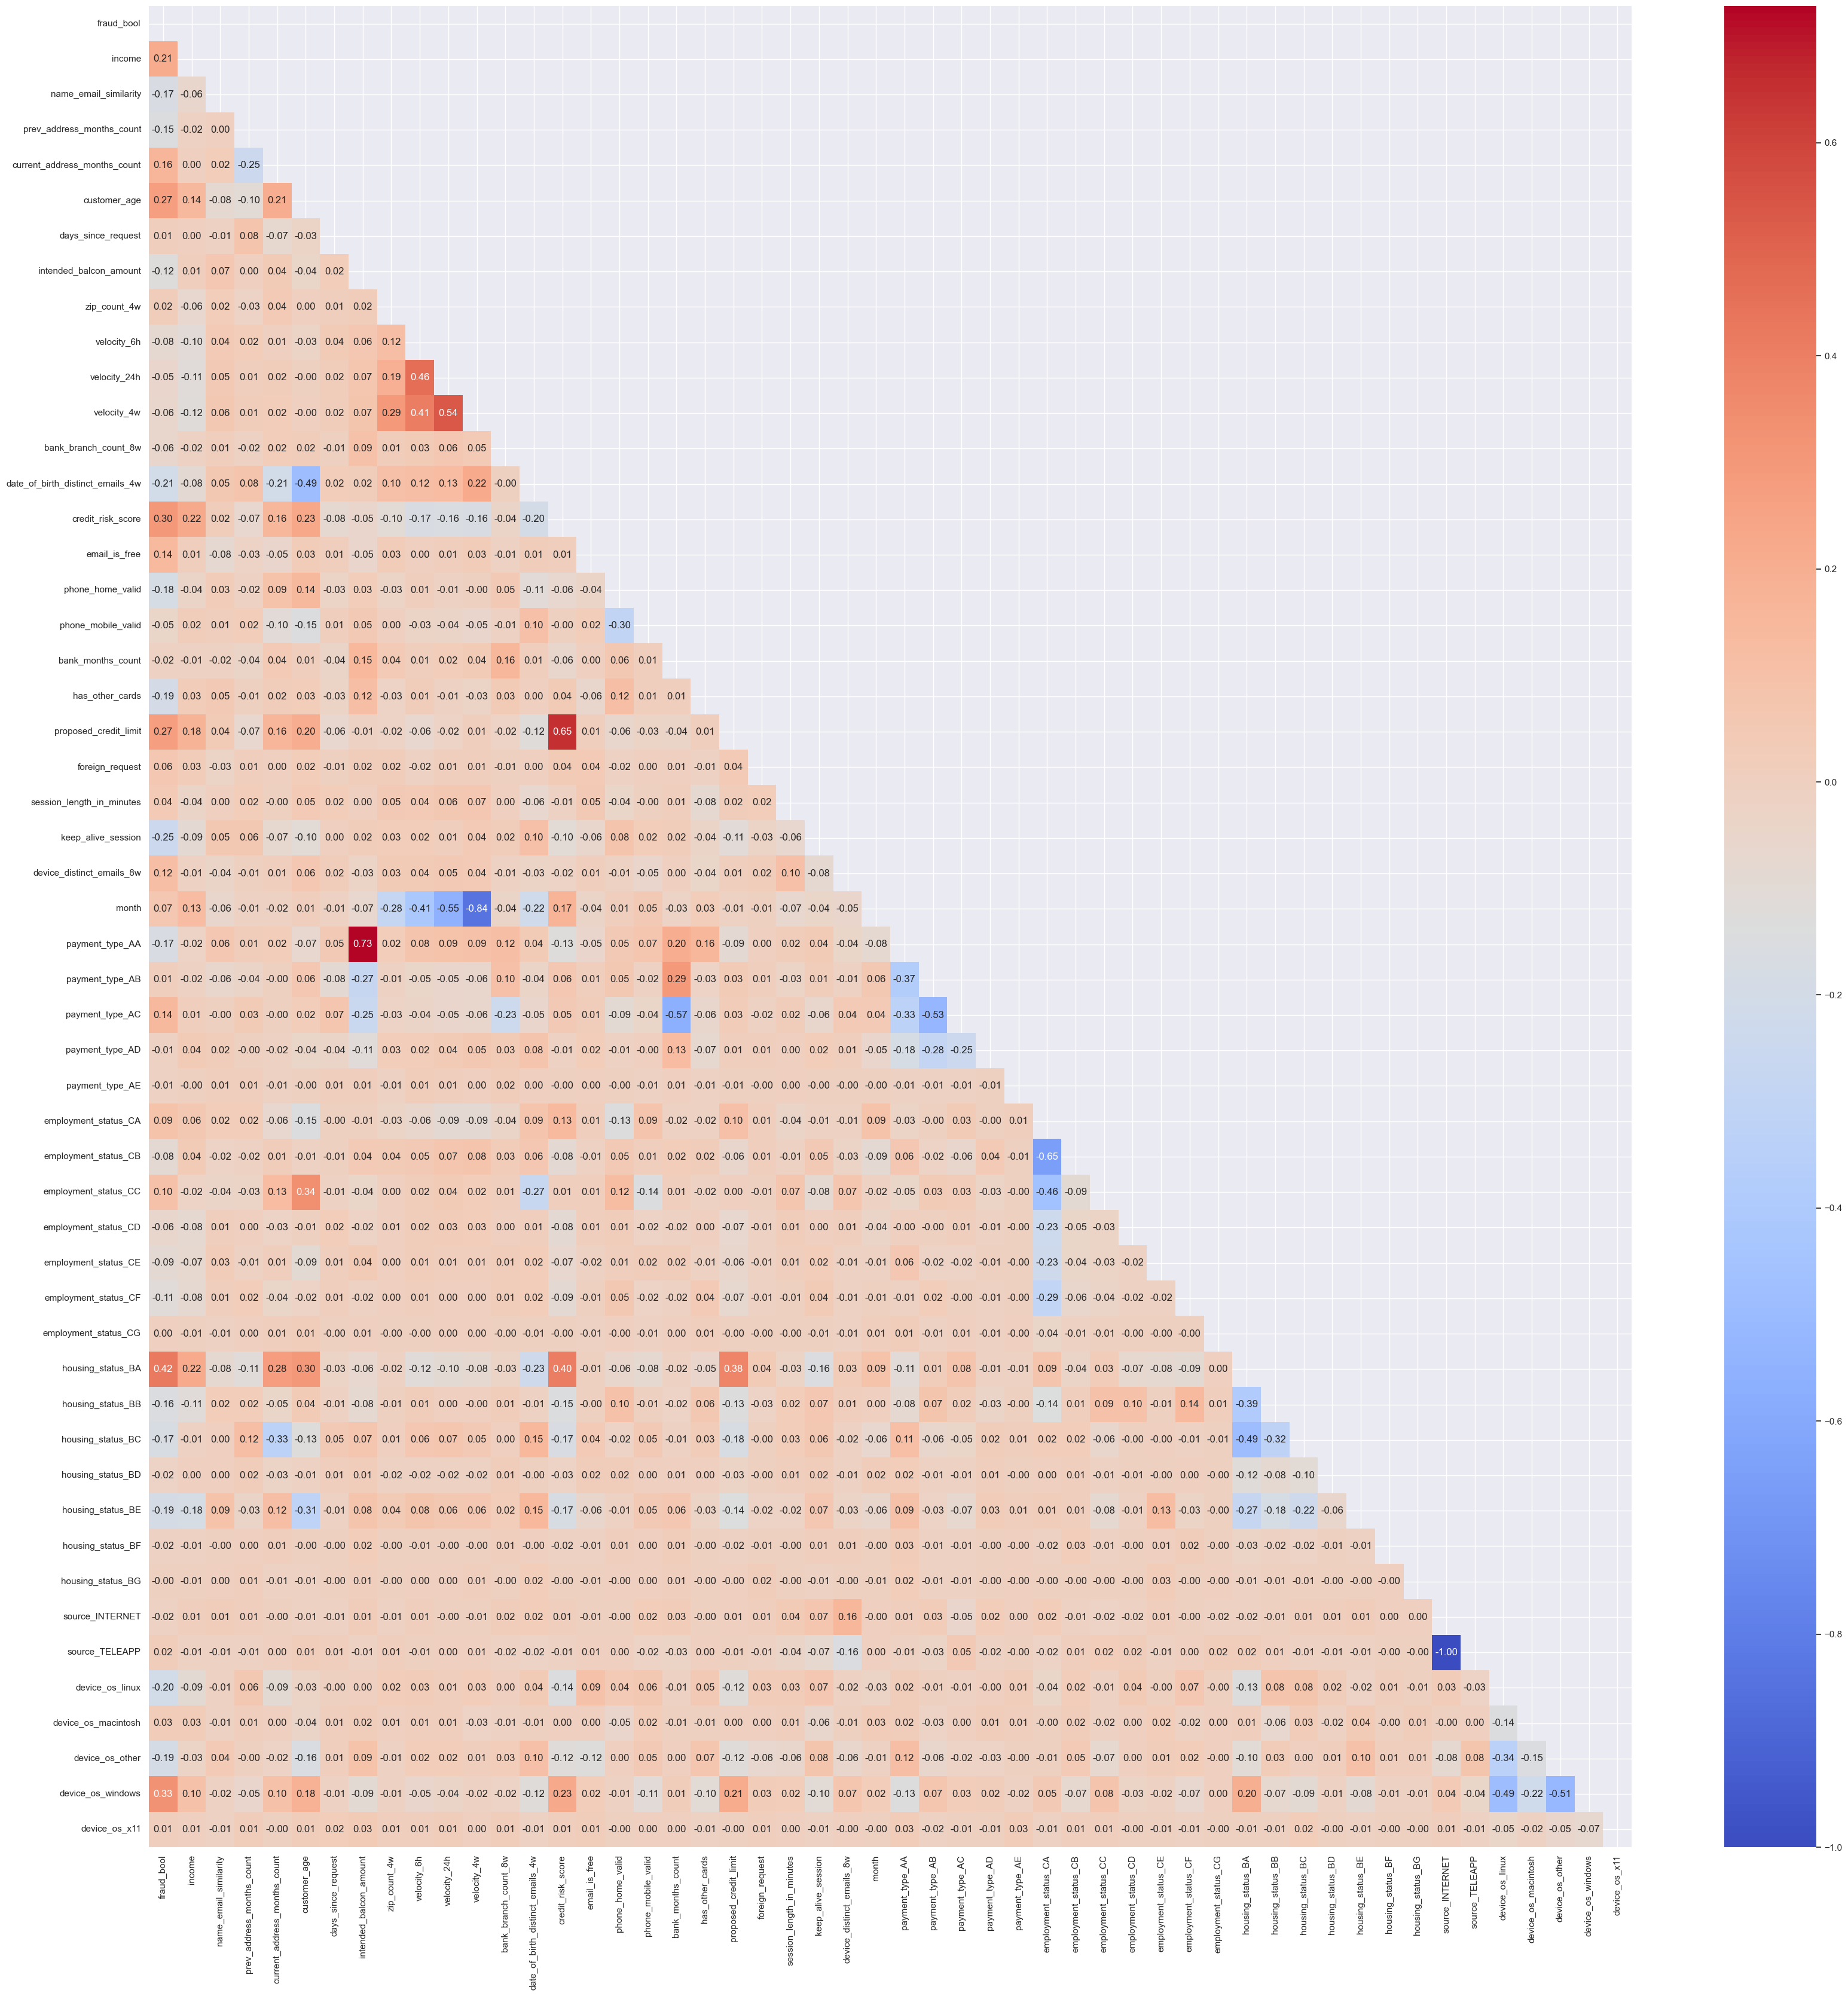

In [24]:
plt.figure(figsize=(40, 40))

corr = undersampled_data.corr()
sns.set(font_scale=1)  # Font Size

upper_triangle = np.triu(corr) #To hide upper triangle

sns.heatmap(corr, annot=True, mask=upper_triangle, cmap='coolwarm', fmt='.2f')

### V Dropping highly correlated columns 

> We will now set the correlation threshold to 0.7 and drop columns having higher than the threshold.

In [25]:
threshold = 0.70
col_corr = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            col_corr.add(colname)

print("Features with correlation greater than Threshold 0.70 are\n\n", col_corr)

Features with correlation greater than Threshold 0.70 are

 {'month', 'source_TELEAPP', 'payment_type_AA'}


In [26]:
# Drop the highly correlated columns
undersampled_data = undersampled_data.drop(columns=col_corr)
print("Data Shape after dropping highly correlated columns: ")
print(undersampled_data.shape)

Data Shape after dropping highly correlated columns: 
(22058, 49)


------------

In [27]:
display(Markdown('# Data Modelling'))

# Data Modelling

### Partitioning the Processed Dataset into Training and Test Sets: Allocating 30% for Testing and 70% for Training

In [28]:
X_undersampled = undersampled_data.drop('fraud_bool', axis=1)  
y_undersampled = undersampled_data['fraud_bool']

X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)

**Models Tried :**

1. Logistic Regression
2. Random Forests 
3. Decision Tree
4. SVM 
5. GDC
6. Multi Layer Perceptron

### Utility functions: 

In [29]:
#Plotting the Confusion Matrix 

def plot_confusion_matrix(y_test, y_pred):
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues_r')
    plt.ylabel('Predicted Values')
    plt.xlabel('Actual Values')
    plt.show()


    #Classification Report 
    class_rep = classification_report(y_test, y_pred)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    

    print('\nClassification Report:\n\n', class_rep)
    print(f'\nAccuracy: {accuracy:.2f}')
    

In [30]:
#plotting Testing and Training Accuracy for every kfold iteration 

def plot_accuracies(train_accuracies, test_accuracies):
    
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', label='Train Accuracy')
    plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, marker='o', label='Test Accuracy')
   
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    
    plt.legend()
    plt.ylim(0.6,1.1)
    
    plt.grid(True)
    plt.show()

In [31]:
def plot_mean_SD(scores):
    scores = np.array(scores) 
    plt.plot(scores, '--o')
    plt.axhline(scores.mean(), color='black', linestyle='--')
    plt.fill_between(np.arange(len(scores)), scores - scores.std(), scores + scores.std(), color='gray', alpha=0.2)
    plt.title('Cross Validation score with Mean and Std deviation')
    plt.ylabel('Accuracy')
    plt.xlabel('Fold')
    plt.show()


In [32]:
display(Markdown('## LOGISTIC REGRESSION'))

## LOGISTIC REGRESSION

### I.I Logistic Regression without Kfolds

Running Logistic Regression Algorithm


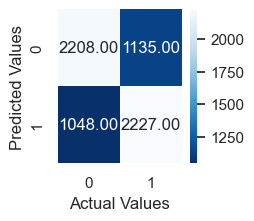


Classification Report:

               precision    recall  f1-score   support

           0       0.68      0.66      0.67      3343
           1       0.66      0.68      0.67      3275

    accuracy                           0.67      6618
   macro avg       0.67      0.67      0.67      6618
weighted avg       0.67      0.67      0.67      6618


Accuracy: 0.67


In [33]:
print("\033[1mRunning Logistic Regression Algorithm\033[0m")
#Model 
log_model = LogisticRegression(random_state=0)

log_model.fit(X_train, y_train) # Train modelling for logistic regression

y_pred = log_model.predict(X_test) # Make Predictions using testing set

plot_confusion_matrix(y_test, y_pred)


###  I.II Logistic Regression using Kfolds

In [34]:
def logistic_regression_with_kfold(X, y, k=10):
    iter = 1
    train_accuracies = []
    test_accuracies = []

    # Kfolds
    kf = KFold(n_splits=k, shuffle=True, random_state=0)

    print("{:<12} {:<18} {:<25}".format("Iteration", "Train Accuracy", "Test Accuracy"))
    
    for i, j in kf.split(X):
        X_train, X_test = X.iloc[i], X.iloc[j]
        y_train, y_test = y.iloc[i], y.iloc[j]

        log_model = LogisticRegression(random_state=0)
        log_model.fit(X_train, y_train)

        y_train_pred = log_model.predict(X_train)
        y_test_pred = log_model.predict(X_test)

        tr_acc = accuracy_score(y_train, y_train_pred) #train acc
        test_acc = accuracy_score(y_test, y_test_pred) #test acc

        train_accuracies.append(tr_acc)
        test_accuracies.append(test_acc)

        print("{:<12} {:<18.2f} {:<25.2f}".format(iter, tr_acc, test_acc))

        iter += 1
    plot_accuracies(train_accuracies,test_accuracies)
    plot_mean_SD(test_accuracies)

Running Logistic Regression Algorithm with k-Fold(6)

Iteration    Train Accuracy     Test Accuracy            
1            0.67               0.67                     
2            0.67               0.68                     
3            0.67               0.67                     
4            0.67               0.67                     
5            0.67               0.66                     
6            0.67               0.65                     
7            0.67               0.67                     
8            0.67               0.67                     
9            0.67               0.68                     
10           0.67               0.67                     


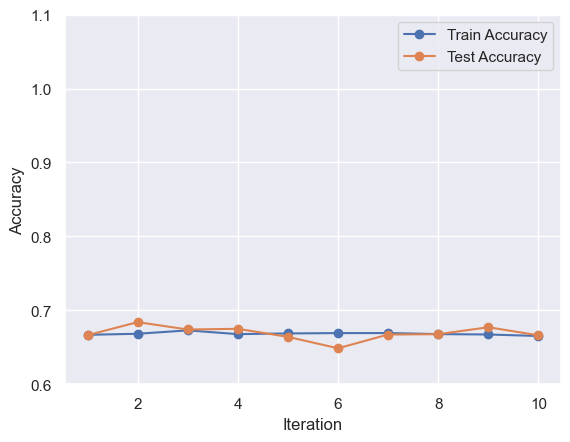

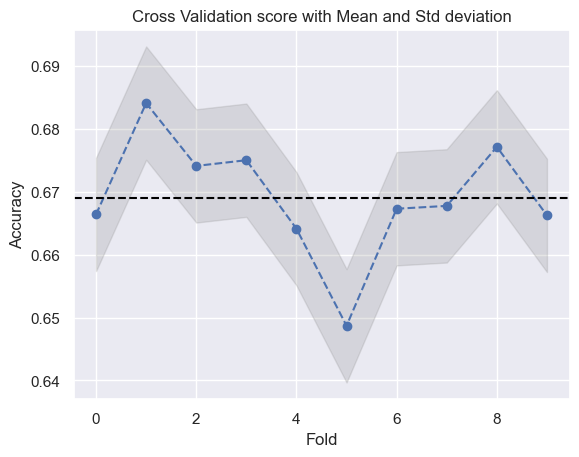

In [35]:
print("\033[1mRunning Logistic Regression Algorithm with k-Fold(6)\n\033[0m")
logistic_regression_with_kfold(X_undersampled, y_undersampled)

###  I.III Logistic Regression using PCA

Running Logistic Regression Algorithm with PCA(Principle Component Analysis): Taking top 20 Components


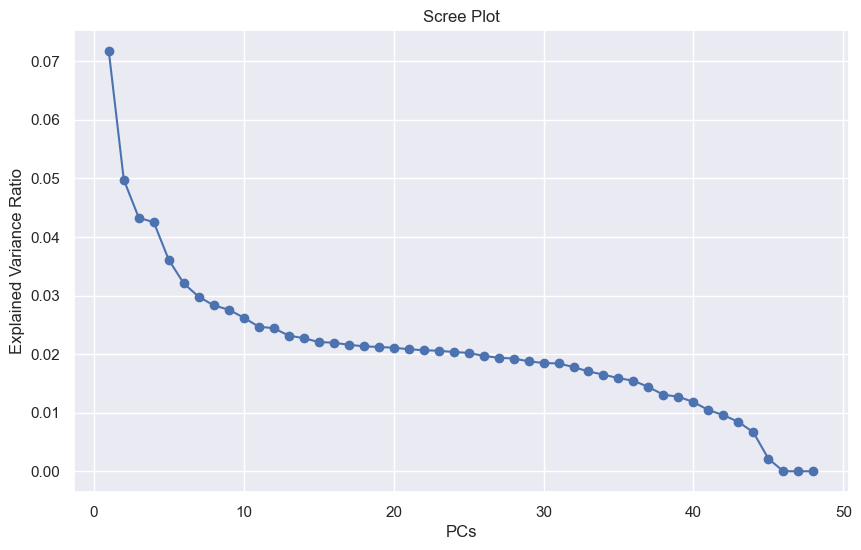

Logistic Regression Performance Before PCA:
Accuracy: 0.6701420368691448
Precision: 0.6624033313503866
Recall: 0.68


Logistic Regression Performance After PCA:
Accuracy: 0.7944998488969477
Precision: 0.7932618683001531
Recall: 0.7908396946564885


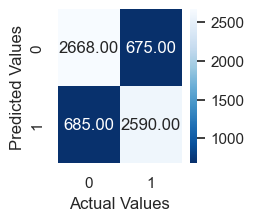


Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.80      0.80      3343
           1       0.79      0.79      0.79      3275

    accuracy                           0.79      6618
   macro avg       0.79      0.79      0.79      6618
weighted avg       0.79      0.79      0.79      6618


Accuracy: 0.79


In [36]:
print("\033[1mRunning Logistic Regression Algorithm with PCA(Principle Component Analysis): Taking top 20 Components\033[0m")

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_undersampled)
X_standardized_df = pd.DataFrame(X_standardized, columns=X_undersampled.columns)

eigenvalues, eigenvectors = np.linalg.eigh(X_standardized_df.cov())
eigenvalues_sorted = np.flip(eigenvalues)
eigenvectors_sorted = np.flip(eigenvectors, axis=1)

variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues_sorted) + 1), variance_ratio, marker='o', linestyle='-')
plt.xlabel('PCs')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Selecting top 20 principal components for analysis

selected_components = eigenvectors_sorted[:, :20]

projected_data = np.dot(X_standardized_df, selected_components)


# Before PCA 
# Create and train the logistic regression model on the undersampled training data
logreg_orig = LogisticRegression()
logreg_orig.fit(X_train, y_train)


# Evaluate the model on the testing data
y_pred_orig = logreg_orig.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
precision_orig = precision_score(y_test, y_pred_orig)
recall_orig = recall_score(y_test, y_pred_orig)

print("Logistic Regression Performance Before PCA:")
print("Accuracy:", accuracy_orig)
print("Precision:", precision_orig)
print("Recall:", recall_orig)

print("\n")
# After PCA

# Split the transformed training data into training and validation sets
X_train_pca, X_val_pca, y_train, y_val = train_test_split(projected_data, y_undersampled, test_size=0.3, random_state=42)

# Train a logistic regression model on the transformed training data
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# Step 4: Evaluate the model's performance on the transformed validation set
y_pred_pca = logreg_pca.predict(X_val_pca)
accuracy_pca = accuracy_score(y_val, y_pred_pca)
precision_pca = precision_score(y_val, y_pred_pca)
recall_pca = recall_score(y_val, y_pred_pca)

print("Logistic Regression Performance After PCA:")
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)

plot_confusion_matrix(y_val, y_pred_pca)

### Concluding Accuracies using Logistic Regression
<span style="color:red; font-size: 18px; font-weight: bold;">Highest Accuracy: 79% with False negative of 672</span>

| Method          | Accuracy |
|-----------------|---------|
| **Without K FOLDS** | **0.67**    |
| **With K Folds**| **0.67** |
| **With PCA**    | **0.79** |


In [1]:
display(Markdown('## DECISION TREE'))

NameError: name 'Markdown' is not defined

###  II.I Decision Tree without using Kfolds

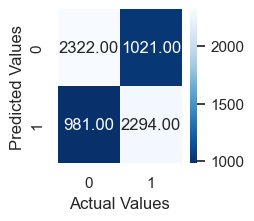


Classification Report:

               precision    recall  f1-score   support

           0       0.70      0.69      0.70      3343
           1       0.69      0.70      0.70      3275

    accuracy                           0.70      6618
   macro avg       0.70      0.70      0.70      6618
weighted avg       0.70      0.70      0.70      6618


Accuracy: 0.70


In [38]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

###  II.II Decision Tree using Kfolds

In [41]:
def decisiontree_with_kfold(X, y, k=10):
    iter = 1
    train_accuracies = []
    test_accuracies = []

    # Kfolds
    kf = KFold(n_splits=k, shuffle=True, random_state=0)

    print("{:<12} {:<18} {:<25}".format("Iteration", "Train Accuracy", "Test Accuracy"))
    
    for i, j in kf.split(X):
        X_train, X_test = X.iloc[i], X.iloc[j]
        y_train, y_test = y.iloc[i], y.iloc[j]

        dt_model = DecisionTreeClassifier(random_state=0)
        dt_model.fit(X_train, y_train)

        y_train_pred = dt_model.predict(X_train)
        y_test_pred = dt_model.predict(X_test)

        tr_acc = accuracy_score(y_train, y_train_pred) #train acc
        test_acc = accuracy_score(y_test, y_test_pred) #test acc

        train_accuracies.append(tr_acc)
        test_accuracies.append(test_acc)

        print("{:<12} {:<18.2f} {:<25.2f}".format(iter, tr_acc, test_acc))

        iter += 1
    plot_accuracies(train_accuracies,test_accuracies)


Running Decision Tree Algorithm with k-Fold(10)

Iteration    Train Accuracy     Test Accuracy            
1            1.00               0.70                     
2            1.00               0.71                     
3            1.00               0.68                     
4            1.00               0.70                     
5            1.00               0.71                     
6            1.00               0.70                     
7            1.00               0.71                     
8            1.00               0.68                     
9            1.00               0.69                     
10           1.00               0.72                     


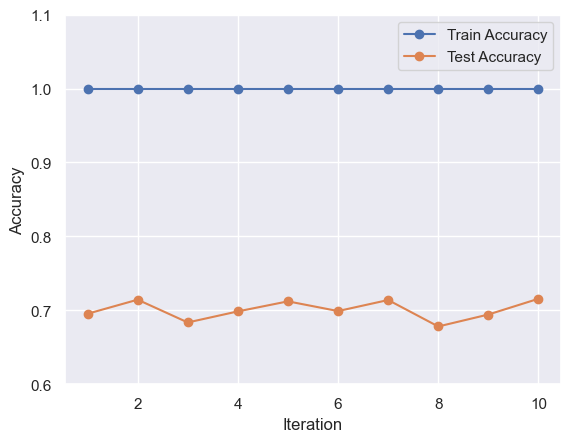

From the significant different between Training and Testing Accuracies, we can see that the Model is overfitting



In [42]:
print("\033[1mRunning Decision Tree Algorithm with k-Fold(10)\n\033[0m")
decisiontree_with_kfold(X_undersampled, y_undersampled)
print("\033[1;31mFrom the significant different between Training and Testing Accuracies, we can see that the Model is overfitting\n\033[m")

### Concluding Accuracies using Decision Tree  
<span style="color:red; font-size: 18px; font-weight: bold;">Overfitting</span>

| Method         | Accuracy |
|----------------|--------- |
| **Without K Folds**|**0.70**   |
| **With K Folds** | **0.72**  |




In [43]:
display(Markdown('## RANDOM FOREST CLASSIFIER'))

## RANDOM FOREST CLASSIFIER

### III.I   Random Forest without KFOLDS

Running Random Forest Classification
 


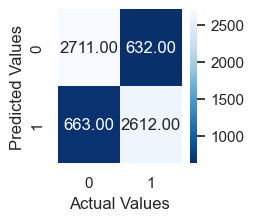


Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.81      0.81      3343
           1       0.81      0.80      0.80      3275

    accuracy                           0.80      6618
   macro avg       0.80      0.80      0.80      6618
weighted avg       0.80      0.80      0.80      6618


Accuracy: 0.80


In [44]:
print("\033[1mRunning Random Forest Classification\n \033[0m")
# MODEL
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

plot_confusion_matrix(y_test, y_pred)

### III. II Random Forest With KFOLDS

In [45]:
def rf_with_kfold(X, y, k=10):
    iter = 1
    train_accuracies = []
    test_accuracies = []

    # Kfolds
    kf = KFold(n_splits=k, shuffle=True, random_state=0)

    print("{:<12} {:<18} {:<25}".format("Iteration", "Train Accuracy", "Test Accuracy"))
    
    for i, j in kf.split(X):
        X_train, X_test = X.iloc[i], X.iloc[j]
        y_train, y_test = y.iloc[i], y.iloc[j]

        rf_model = RandomForestClassifier(random_state=0)
        rf_model.fit(X_train, y_train)
        
        y_pred_train = rf_model.predict(X_train)
        y_pred_test = rf_model.predict(X_test)
        tr_acc = accuracy_score(y_train, y_pred_train) #train acc
        test_acc = accuracy_score(y_test, y_pred_test) #test acc

        train_accuracies.append(tr_acc)
        test_accuracies.append(test_acc)

        print("{:<12} {:<18.2f} {:<25.2f}".format(iter, tr_acc, test_acc))

        iter += 1
    plot_accuracies(train_accuracies,test_accuracies)
    plot_mean_SD(test_accuracies)

Running Random Forest Algorithm with k-Fold(10)

Iteration    Train Accuracy     Test Accuracy            
1            1.00               0.80                     
2            1.00               0.80                     
3            1.00               0.78                     
4            1.00               0.79                     
5            1.00               0.80                     
6            1.00               0.79                     
7            1.00               0.81                     
8            1.00               0.79                     
9            1.00               0.80                     
10           1.00               0.81                     


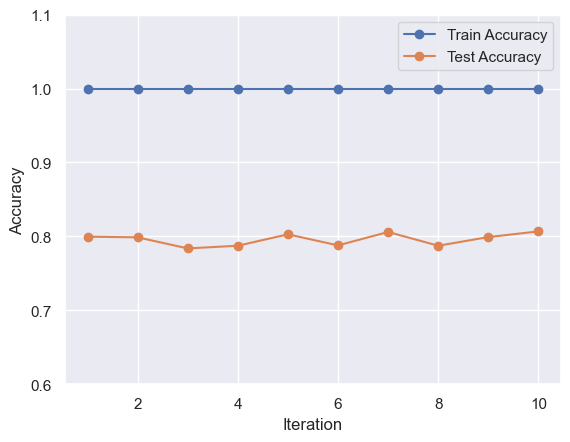

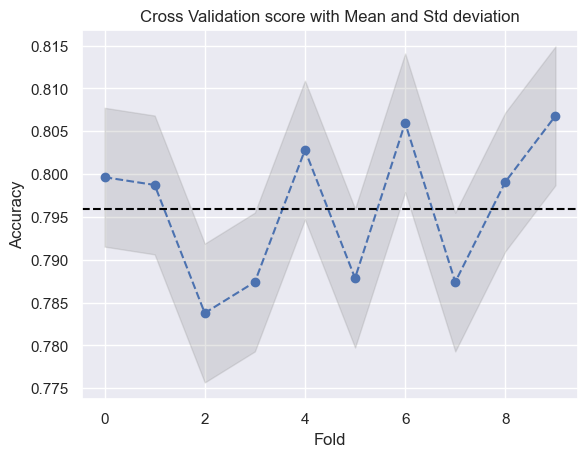

From the significant different between Training and Testing Accuracies, we can see that the Model is overfitting



In [46]:
print("\033[1mRunning Random Forest Algorithm with k-Fold(10)\n\033[0m")

rf_with_kfold(X_undersampled,y_undersampled)
print("\033[1;31mFrom the significant different between Training and Testing Accuracies, we can see that the Model is overfitting\n\033[m")

### Concluding Accuracies using Random Forests
<span style="color:red; font-size: 18px; font-weight: bold;">Overfitting</span>



| Method         | Accuracy |
|----------------|--------- |
| **Without K Folds**| **0.80**   |
| **With K Folds**   | **0.81**     |


In [47]:
display(Markdown('## SUPPORT VECTOR MACHINE'))

## SUPPORT VECTOR MACHINE

### IV. I  SVM Without using KFOLDS

Running SVMs Classification Algorithm
 


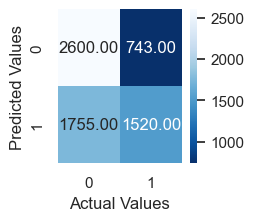


Classification Report:

               precision    recall  f1-score   support

           0       0.60      0.78      0.68      3343
           1       0.67      0.46      0.55      3275

    accuracy                           0.62      6618
   macro avg       0.63      0.62      0.61      6618
weighted avg       0.63      0.62      0.61      6618


Accuracy: 0.62


In [48]:
print("\033[1mRunning SVMs Classification Algorithm\n \033[0m")

#model 
svm_model = SVC();
svm_model = SVC(probability=True) 
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

plot_confusion_matrix(y_test, y_pred_svm)

### IV. II SVM With KFOLDS

In [49]:
def svm_with_kfold(X, y, k=10):
    iter = 1
    train_accuracies = []
    test_accuracies = []

    # Kfolds
    kf = KFold(n_splits=k, shuffle=True, random_state=0)

    print("{:<12} {:<18} {:<25}".format("Iteration", "Train Accuracy", "Test Accuracy"))
    
    for i, j in kf.split(X):
        X_train, X_test = X.iloc[i], X.iloc[j]
        y_train, y_test = y.iloc[i], y.iloc[j]

        svm_model = SVC(random_state=0, kernel = 'rbf')
        svm_model.fit(X_train, y_train)
        
        y_pred_train = svm_model.predict(X_train)
        y_pred_test = svm_model.predict(X_test)
            
        tr_acc = accuracy_score(y_train, y_pred_train) #train acc
        test_acc = accuracy_score(y_test, y_pred_test) #test acc

        train_accuracies.append(tr_acc)
        test_accuracies.append(test_acc)

        print("{:<12} {:<18.2f} {:<25.2f}".format(iter, tr_acc, test_acc))

        iter += 1
    plot_accuracies(train_accuracies,test_accuracies)
    plot_mean_SD(test_accuracies)

Running SVM Algorithm with k-Fold(10)

Iteration    Train Accuracy     Test Accuracy            
1            0.62               0.63                     
2            0.62               0.63                     
3            0.62               0.62                     
4            0.62               0.61                     
5            0.62               0.61                     
6            0.62               0.61                     
7            0.62               0.63                     
8            0.62               0.61                     
9            0.62               0.60                     
10           0.62               0.61                     


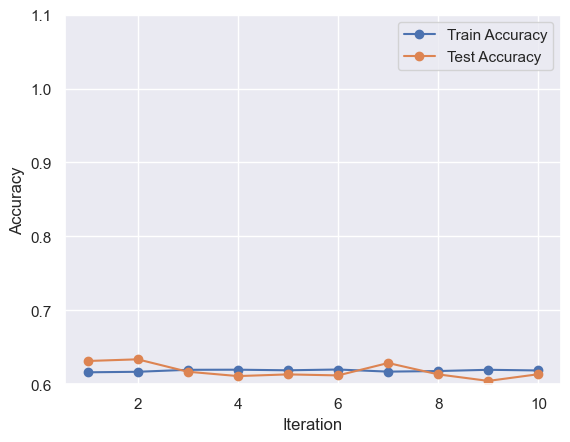

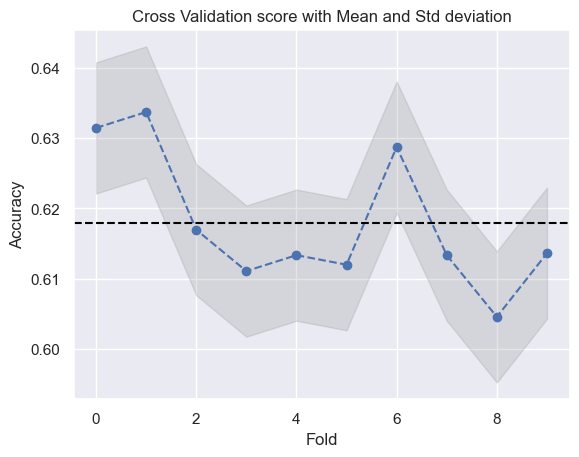

In [50]:
print("\033[1mRunning SVM Algorithm with k-Fold(10)\n\033[0m")
svm_with_kfold(X_undersampled, y_undersampled)


### Concluding Accuracies using SVMs
<span style="color:red; font-size: 18px; font-weight: bold;">Highest Accuracy: 62% with False negative of 1739</span>

| Method         | Accuracy |
|----------------|---------|
| **Without K FOLDS**|**62**    |
| **With K Folds**   | **62**    |





In [51]:
display(Markdown('## GRADIENT BOOSTING MACHINE'))

## GRADIENT BOOSTING MACHINE

### V. I  GBC without KFolds

Running GBC Classification Algorithm
 


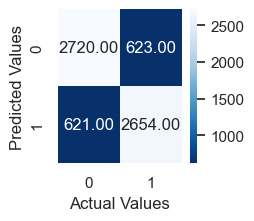


Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.81      0.81      3343
           1       0.81      0.81      0.81      3275

    accuracy                           0.81      6618
   macro avg       0.81      0.81      0.81      6618
weighted avg       0.81      0.81      0.81      6618


Accuracy: 0.81


In [52]:
print("\033[1mRunning GBC Classification Algorithm\n \033[0m")
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

### V. II GBC with KFolds

In [53]:
def gbm_with_kfold(X, y, k=10):
    iter = 1
    train_accuracies = []
    test_accuracies = []

    # Kfolds
    kf = KFold(n_splits=k, shuffle=True, random_state=0)

    print("{:<12} {:<18} {:<25}".format("Iteration", "Train Accuracy", "Test Accuracy"))
    
    for i, j in kf.split(X):
        X_train, X_test = X.iloc[i], X.iloc[j]
        y_train, y_test = y.iloc[i], y.iloc[j]

        gbm_model = GradientBoostingClassifier(random_state=0)
        gbm_model.fit(X_train, y_train)
        
        y_pred_test = gbm_model.predict(X_test)
        y_pred_train = gbm_model.predict(X_train)
        
        tr_acc = accuracy_score(y_train, y_pred_train) #train acc
        test_acc = accuracy_score(y_test, y_pred_test) #test acc

        train_accuracies.append(tr_acc)
        test_accuracies.append(test_acc)
        

        print("{:<12} {:<18.2f} {:<25.2f}".format(iter, tr_acc, test_acc))

        iter += 1
    train_scores = np.array(train_accuracies)
    test_scores = np.array(test_accuracies)
   
    
    plot_accuracies(train_accuracies,test_accuracies)
    plot_mean_SD(test_scores)

Running GBC Algorithm with k-Fold(10)

Iteration    Train Accuracy     Test Accuracy            
1            0.82               0.81                     
2            0.82               0.81                     
3            0.82               0.80                     
4            0.82               0.80                     
5            0.82               0.81                     
6            0.82               0.80                     
7            0.82               0.82                     
8            0.82               0.81                     
9            0.82               0.82                     
10           0.82               0.81                     


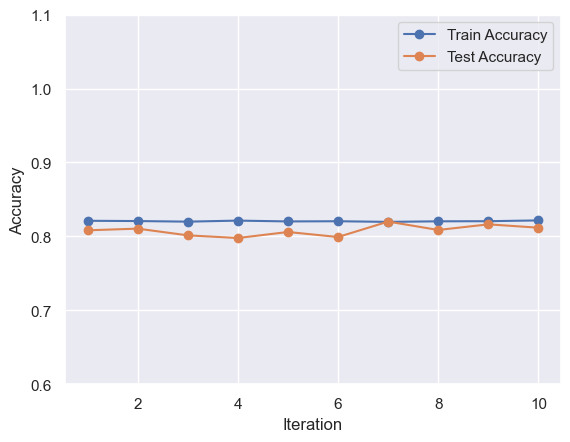

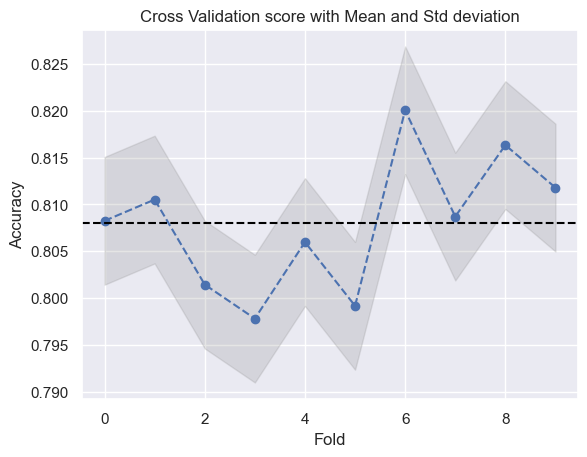

In [54]:
print("\033[1mRunning GBC Algorithm with k-Fold(10)\n\033[0m")

gbm_with_kfold(X_undersampled, y_undersampled)

### Concluding Accuracies using GBC
<span style="color:red; font-size: 18px; font-weight: bold;">Highest Accuracy: 81% with False negative of 633</span>
| Method         | Accuracy|
|----------------|---------|
| **Without K FOLDS**|   **0.81**  |
| **With K Folds**   | **0.81**    |

In [55]:
display(Markdown('## MULTI-LAYER PERCEPTRON'))

## MULTI-LAYER PERCEPTRON

### VI. I MLP without KFolds

Running MLP Classification Algorithm
 


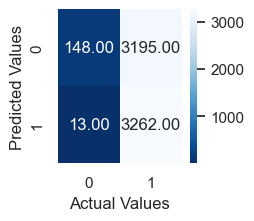


Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.04      0.08      3343
           1       0.51      1.00      0.67      3275

    accuracy                           0.52      6618
   macro avg       0.71      0.52      0.38      6618
weighted avg       0.71      0.52      0.37      6618


Accuracy: 0.52


In [74]:
print("\033[1mRunning MLP Classification Algorithm\n \033[0m")
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

### VI. II MLP with KFolds

In [75]:
def mlp_with_kfold(X, y, k=10):
    iter = 1
    train_accuracies = []
    test_accuracies = []

    # Kfolds
    kf = KFold(n_splits=k, shuffle=True, random_state=0)

    print("{:<12} {:<18} {:<25}".format("Iteration", "Train Accuracy", "Test Accuracy"))
    
    for i, j in kf.split(X):
        X_train, X_test = X.iloc[i], X.iloc[j]
        y_train, y_test = y.iloc[i], y.iloc[j]

        mlp = MLPClassifier(random_state=42)
        mlp.fit(X_train, y_train)
        
        # Training accuracy
        train_sc = mlp.score(X_train, y_train)
        
        # Test accuracy
        y_pred = mlp.predict(X_test)
        test_sc = accuracy_score(y_test, y_pred)
        
        train_accuracies.append(train_sc)
        test_accuracies.append(test_sc)

        print("{:<12} {:<18.2f} {:<25.2f}".format(iter, train_sc, test_sc))

        iter += 1

    train_scores = np.array(train_accuracies)
    test_scores = np.array(test_accuracies)
   
    plot_accuracies(train_accuracies, test_accuracies)
    plot_mean_SD(test_accuracies)


Running MLP Algorithm with k-Fold(10)

Iteration    Train Accuracy     Test Accuracy            
1            0.68               0.67                     
2            0.72               0.73                     
3            0.68               0.66                     
4            0.63               0.62                     
5            0.78               0.76                     
6            0.74               0.73                     
7            0.71               0.70                     
8            0.60               0.60                     
9            0.57               0.57                     
10           0.77               0.76                     


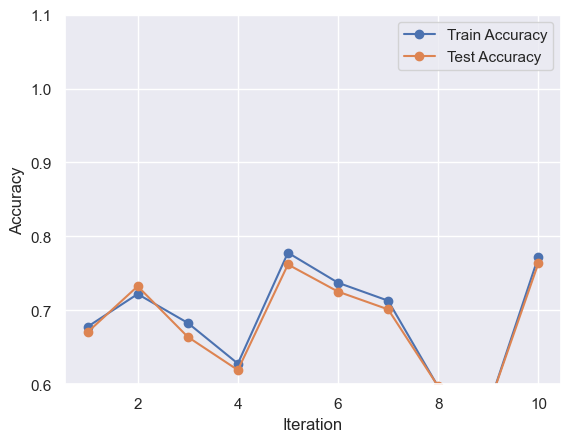

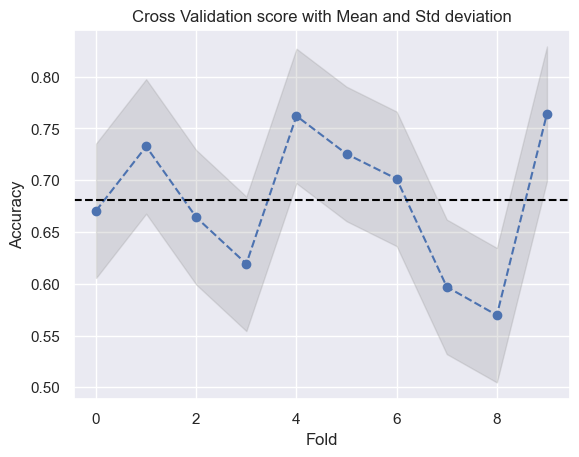

In [76]:
print("\033[1mRunning MLP Algorithm with k-Fold(10)\n\033[0m")
mlp_with_kfold(X_undersampled, y_undersampled)

### Concluding Accuracies using MLP
<span style="color:red; font-size: 18px; font-weight: bold;"> Accuracy: 73%</span>
| Method         | Accuracy|
|----------------|---------|
| **Without K FOLDS**|   **0.52**  |
| **With K Folds**   | **0.73**    |

In [77]:
display(Markdown('## ROC CURVE'))

## ROC CURVE

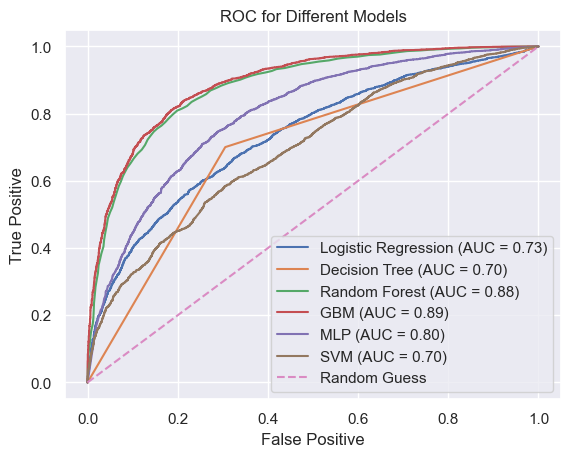

In [78]:
def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')



y_pred_prob_logistic = log_model.predict_proba(X_test)[:, 1]     #LOGISTIC REGRESSION
y_pred_prob_decision_tree = dt_model.predict_proba(X_test)[:, 1] #DECISION TREE
y_pred_prob_random_forest = rf_model.predict_proba(X_test)[:, 1] #RANDOM FOREST
y_pred_prob_gbm = model.predict_proba(X_test)[:, 1]              #GBC
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]                #MLP
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]           #SVM


# Plot  ROC 
plot_roc_curve(y_test, y_pred_prob_logistic, 'Logistic Regression')
plot_roc_curve(y_test, y_pred_prob_decision_tree, 'Decision Tree')
plot_roc_curve(y_test, y_pred_prob_random_forest, 'Random Forest')
plot_roc_curve(y_test, y_pred_prob_gbm, 'GBM')
plot_roc_curve(y_test, y_pred_prob_mlp, 'MLP')
plot_roc_curve(y_test, y_pred_prob_svm, 'SVM')

# Guessing Line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.title('ROC for Different Models')
plt.legend()
plt.show()


### Concluding Different Models

<span style="color:red; font-size: 16px; font-weight: bold;">
Best Models for the Prediction is Gradient Boosting Machine followed by Multi-Layer Perceptron.
We cannot take Random Forest Method into consideration due to the probability of overfitting.
</span>

In [61]:
display(Markdown('# Data Modelling with Hyper-Tuning'))

# Data Modelling with Hyper-Tuning

In [62]:
display(Markdown('## LOGISTIC REGRESSION WITH HYPER TUNING'))

## LOGISTIC REGRESSION WITH HYPER TUNING

Best Hyperparameters are: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'C': 0.1}


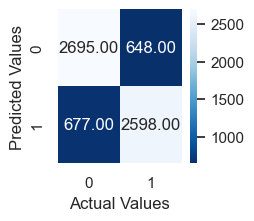


Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.81      0.80      3343
           1       0.80      0.79      0.80      3275

    accuracy                           0.80      6618
   macro avg       0.80      0.80      0.80      6618
weighted avg       0.80      0.80      0.80      6618


Accuracy: 0.80


In [63]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
}

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=0)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=0
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_logistic_model = random_search.best_estimator_

print("Best Hyperparameters are:", best_params)

# Evaluate the best model on testing data
y_pred = best_logistic_model.predict(X_test)


plot_confusion_matrix(y_test, y_pred)


### Concluding Accuracies using Logistic Regression with Hyper-Tuning
<span style="color:red; font-size: 18px; font-weight: bold;">
    Highest Accuracy: 80% with False negative of 657 <br/>
    Hyperparameter: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'C': 0.1}
</span>

In [64]:
display(Markdown('## GRADIENT BOOSTING MACHINE WITH HYPER TUNING'))

## GRADIENT BOOSTING MACHINE WITH HYPER TUNING

Best Hyperparameters are : {'learning_rate': 0.09473095986778095, 'max_depth': 5, 'max_features': 'sqrt'}


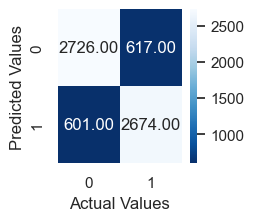


Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.82      0.82      3343
           1       0.81      0.82      0.81      3275

    accuracy                           0.82      6618
   macro avg       0.82      0.82      0.82      6618
weighted avg       0.82      0.82      0.82      6618


Accuracy: 0.82


In [65]:
# Define the parameter distribution
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 5, 7, 9],
    'max_features': [ 'sqrt', 'log2'],
}


gbm_model = GradientBoostingClassifier(random_state=0)

random_search = RandomizedSearchCV(gbm_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=0, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_gbm_model = random_search.best_estimator_


print("Best Hyperparameters are :", best_params)

# Evaluate the best model on testing data
y_pred = best_gbm_model.predict(X_test)
plot_confusion_matrix(y_test,y_pred)



### Concluding Accuracies using GBM
<span style="color:red; font-size: 18px; font-weight: bold;">
    Highest Accuracy: 82% with False negative of 601<br/>
    Best Hyperparameter : {'learning_rate': 0.09473095986778095, 'max_depth': 5, 'max_features': 'sqrt'}
</span>


In [66]:
display(Markdown('## SUPPORT VECTOR MACHINE WITH HYPER TUNING'))

## SUPPORT VECTOR MACHINE WITH HYPER TUNING

In [ ]:
# param_dist = {
#     'C': [1, 10],
#     'kernel': ['linear', 'rbf'],
# }

# svm_model = SVC(random_state=0)

# random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=0)

# random_search.fit(X_train, y_train)

# best_params = random_search.best_params_
# best_svm_model = random_search.best_estimator_

# print("Best Hyperparameters are:", best_params)

# y_pred = best_svm_model.predict(X_test)

# plot_confusion_matrix(y_test,y_pred)

Running Hyperparameter tuning for SVMs 


/Users/dhruvsaini/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


### Concluding Accuracies using SVM with Hyper-Tuning
<span style="color:red; font-size: 18px; font-weight: bold;">N/A</span>

In [67]:
display(Markdown('## MULTI-LAYER PERCEPTRON WITH HYPER TUNING'))

## MULTI-LAYER PERCEPTRON WITH HYPER TUNING

Best Hyperparameters: {'hidden_layer_sizes': (30, 20, 10), 'alpha': 0.001, 'activation': 'relu'}


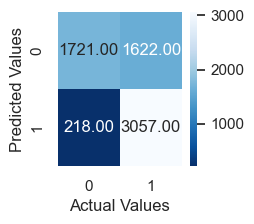


Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.51      0.65      3343
           1       0.65      0.93      0.77      3275

    accuracy                           0.72      6618
   macro avg       0.77      0.72      0.71      6618
weighted avg       0.77      0.72      0.71      6618


Accuracy: 0.72


In [68]:
param_dist = {
    'hidden_layer_sizes': [ (100,), (50, 50), (30,20,10)],
    'activation': [ 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

mlp_model = MLPClassifier(random_state=0)

random_search = RandomizedSearchCV(
    mlp_model, param_distributions=param_dist, n_iter=10, cv=5,
    scoring='accuracy', random_state=0, n_jobs=-1
)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_mlp_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred = best_mlp_model.predict(X_test)

plot_confusion_matrix(y_test,y_pred)

### Concluding Accuracies using MLP
<span style="color:red; font-size: 18px; font-weight: bold;">Highest Accuracy: 72% with False negative of 218<br/>
    Best Hyperparameters: {'hidden_layer_sizes': (30, 20, 10), 'alpha': 0.001, 'activation': 'relu'}
</span>

In [69]:
display(Markdown('## ROC CURVE FOR DIFFERENT HYPER TUNED MODELS'))

## ROC CURVE FOR DIFFERENT HYPER TUNED MODELS

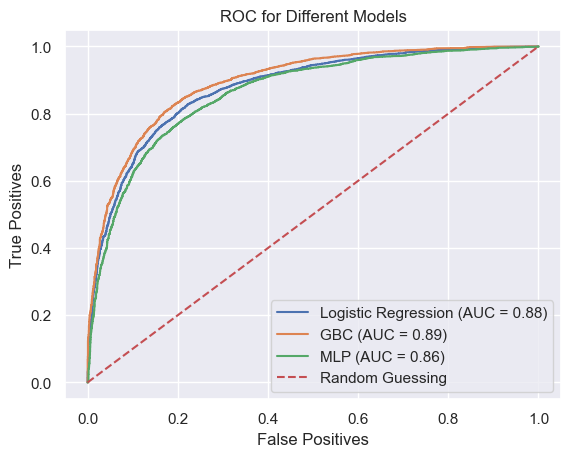

In [70]:

def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = roc_auc_score(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')


y_pred_prob_logistic = best_logistic_model.predict_proba(X_test)[:, 1]# LOGISTIC REGRESSION
y_pred_prob_gbm = best_gbm_model.predict_proba(X_test)[:, 1]  #GBC
y_pred_prob_mlp = best_mlp_model.predict_proba(X_test)[:, 1]   #MLP


plot_roc_curve(y_test, y_pred_prob_logistic, 'Logistic Regression')
plot_roc_curve(y_test, y_pred_prob_gbm, 'GBC')
plot_roc_curve(y_test, y_pred_prob_mlp, 'MLP')


plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC for Different Models')
plt.legend()
plt.show()


In [72]:
display(Markdown('# Conclusions'))

# Conclusions

### BEFORE HYPER PARAMTER TUNING

| Method              | Without KFold Accuracy  | With KFold Accuracy|Findings
|---------------------|------------------|-------------|-------------|
| Logistic Regression | 0.67             |   0.68          | Low Accuracy|
| Decision Tree       | 0.70           |     0.72        |Overfitting|
| Random Forest       | 0.81             |   0.81         |Overfitting|
| SVM                |0.62          |        0.62     |Low Accuracy|
| GBC                | 0.81             |     0.81  |     Good Accuracy + Less False Negatives |
|MLP| 0.52|0.73| Good Accuracy with kFold(10)

### AFTER HYPER PARAMETER TUNING 


| Method              | Accuracy|Findings|
|----------------     |---------|---------|
| Logistic Regression | 0.80    |Good Accuracy with Hypertuning|
| GBC.                | 0.82    |Best Accuracy with Hypertuning|
|MLP|0.72|Improved Accuracy with Hypertuning|